In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 01-Business understanding
Business objectives:<br>
Deeply understand the environmental impact, focusing on climate change and global warming, from the agri-food industry.<br>
Provide evidence of policy setting to reduce the CO2 emissions from the agri-food sector.<br><br>
Data mining objectives:<br>
Examine the correlation between carbon dioxide (CO2) emissions within the agri-food sector and the subsequent temperature rise.<br>
Analyse the influence of various countries based on aggregated data on emissions and temperature change.<br>
Identify the countries with the highest average temperature increase by year and analyse their contributions to the overall environmental impact.<br>

### 02-Data understanding
Load Dataset

In [89]:
emission_df = pd.read_csv('..\mydataset\Agrifood_co2_emission.csv')
population_df = pd.read_csv('..\mydataset\Agrifood_co2_population.csv')
emission_df

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...  Fertilizers Manufacturing      IPPU  \
0            63.1152  -2388.8030  ...                  11.997000  209.9778   
1            61.2125  -2388.8030  ...                  12.853900  217.0388   
2            53.3170  -2388.8030  ...                  13.492900  222.1156   
3            54.3617  -2388.8030  ...                  14.055900  201.2057   
4            53.9874  -2388.8030  ...                  15.126900  182.2905   
...              ...         ...  ...                        ...       ...   
6960        251.1465  76500.2982  ...                2585.080847  858.9820   
6961        255.7975  76500.2982  ...                1227.240253  889.4250   
6962        327.0897  76500.2982  ...                1127.687805  966.2650   
6963        290.1893  76500.2982  ...                2485.528399  945.9420   
6964        238.7639  76500.2982  ...                1227.240253  940.4200   

      Manure applied to Soils  Manure left on Pasture  Manure Management  \
0                    260.1431               1590.5319           319.1763   
1                    268.6292               1657.2364           342.3079   
2                    264.7898               1653.5068           349.1224   
3                    261.7221               1642.9623           352.2947   
4                    267.6219               1689.3593           367.6784   
...                       ...                     ...                ...   
6960                  96.1332               2721.1459           282.5994   
6961                  81.2314               2744.8763           255.5900   
6962                  81.0712               2790.0949           257.2735   
6963                  85.7211               2828.7215           267.5224   
6964                  85.3143               2829.7457           266.7316   

      Fires in organic soils  Fires in humid tropical forests  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4           

In [90]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [91]:
population_df

Area  Year  Rural population  Urban population  \
0     Afghanistan  1990           9655167           2593947   
1     Afghanistan  1991          10230490           2763167   
2     Afghanistan  1992          10995568           2985663   
3     Afghanistan  1993          11858090           3237009   
4     Afghanistan  1994          12690115           3482604   
...           ...   ...               ...               ...   
6960     Zimbabwe  2016          10934468           5215894   
6961     Zimbabwe  2017          11201138           5328766   
6962     Zimbabwe  2018          11465748           5447513   
6963     Zimbabwe  2019          11725970           5571525   
6964     Zimbabwe  2020          11980005           5700460   

      Total Population - Male  Total Population - Female  total_emission  \
0                   5348387.0                  5346409.0     2198.963539   
1                   5372959.0                  5372208.0     2323.876629   
2                   6028494.0                  6028939.0     2356.304229   
3                   7003641.0                  7000119.0     2368.470529   
4                   7733458.0                  7722096.0     2500.768729   
...                       ...                        ...             ...   
6960                6796658.0                  7656047.0    98491.026350   
6961                6940631.0                  7810471.0    97159.311550   
6962                7086002.0                  7966181.0    97668.308200   
6963                7231989.0                  8122618.0    98988.062800   
6964                7385220.0                  8284447.0    96505.221850   

      Average Temperature  
0                0.536167  
1                0.020667  
2               -0.259583  
3                0.101917  
4                0.372250  
...                   ...  
6960             1.120250  
6961             0.046500  
6962             0.516333  
6963             0.985667  
6964             0.189000  

[6965 rows x 8 columns]

In [92]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Area                       6965 non-null   object 
 1   Year                       6965 non-null   int64  
 2   Rural population           6965 non-null   int64  
 3   Urban population           6965 non-null   int64  
 4   Total Population - Male    6965 non-null   float64
 5   Total Population - Female  6965 non-null   float64
 6   total_emission             6965 non-null   float64
 7   Average Temperature        6965 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 435.4+ KB


Explore Data

In [93]:
emission_desc = emission_df.describe()
population_desc = population_df.describe()
round(emission_desc.transpose(), 2)

count      mean        std        min  \
Year                             6965.0   2005.12       8.89    1990.00   
Savanna fires                    6934.0   1188.39    5246.29       0.00   
Forest fires                     6872.0    919.30    3720.08       0.00   
Crop Residues                    5576.0    998.71    3700.35       0.00   
Rice Cultivation                 6965.0   4259.67   17613.83       0.00   
Drained organic soils (CO2)      6965.0   3503.23   15861.45       0.00   
Pesticides Manufacturing         6965.0    333.42    1429.16       0.00   
Food Transport                   6965.0   1939.58    5616.75       0.00   
Forestland                       6472.0 -17828.29   81832.21 -797183.08   
Net Forest conversion            6472.0  17605.64  101157.53       0.00   
Food Household Consumption       6492.0   4847.58   25789.14       0.00   
Food Retail                      6965.0   2043.21    8494.25       0.00   
On-farm Electricity Use          6965.0   1626.68    9343.18       0.00   
Food Packaging                   6965.0   1658.63   11481.34       0.00   
Agrifood Systems Waste Disposal  6965.0   6018.44   22156.74       0.34   
Food Processing                  6965.0   3872.72   19838.22       0.00   
Fertilizers Manufacturing        6965.0   3035.72   11693.03       0.00   
IPPU                             6222.0  19991.50  111420.85       0.00   
Manure applied to Soils          6037.0    923.23    3226.99       0.05   
Manure left on Pasture           6965.0   3518.03    9103.56       0.00   
Manure Management                6037.0   2263.34    7980.54       0.43   
Fires in organic soils           6965.0   1210.32   22669.85       0.00   
Fires in humid tropical forests  6810.0    668.45    3264.88       0.00   
On-farm energy use               6009.0   3008.98   12637.86       0.03   
total_emission                   6965.0  64091.24  228312.96 -391884.06   
Average Temperature              6965.0      0.87       0.56      -1.42   

                                     25%       50%       75%         max  
Year                             1997.00   2005.00   2013.00     2020.00  
Savanna fires                       0.00      1.65    111.08   114616.40  
Forest fires                        0.00      0.52     64.95    52227.63  
Crop Residues                      11.01    103.70    377.64    33490.07  
Rice Cultivation                  181.26    534.82   1536.64   164915.26  
Drained organic soils (CO2)         0.00      0.00    690.41   241025.07  
Pesticides Manufacturing            6.00     13.00    116.33    16459.00  
Food Transport                     27.96    204.96   1207.00    67945.76  
Forestland                      -2848.35    -62.92      0.00   171121.08  
Net Forest conversion               0.00     44.44   4701.75  1605106.10  
Food Household Consumption         11.40    155.47   1377.15   466288.20  
Food Retail                        26.82    172.04   1076.00   133784.07  
On-farm Electricity Use             8.04     29.12    499.94   165676.30  
Food Packaging                     67.63     74.02    281.79   175741.31  
Agrifood Systems Waste Disposal    86.68    901.28   3006.44   213289.70  
Food Processing                   209.59    344.76   1236.91   274253.51  
Fertilizers Manufacturing         360.36   1115.05   2024.87   170826.42  
IPPU                               39.03    803.71   6155.17  1861640.66  
Manure applied to Soils            16.30    120.44    460.12    34677.36  
Manure left on Pasture            139.67    972.57   2430.79    92630.76  
Manure Management                  37.63    269.86   1126.82    70592.65  
Fires in organic soils              0.00      0.00      0.00   991717.54  
Fires in humid tropical forests     0.00      0.00      9.58    51771.26  
On-farm energy use                 13.29    141.10   1136.93   248879.18  
total_emission                   5221.24  12147.65  35139.73  3115113.75  
Average Temperature                 0.51      0.83      1.

In [94]:
round(population_desc.transpose(), 2)

count         mean          std        min  \
Year                       6965.0      2005.12         8.89    1990.00   
Rural population           6965.0  17857735.39  89015213.76       0.00   
Urban population           6965.0  16932296.97  65743619.61       0.00   
Total Population - Male    6965.0  17619629.63  76039931.01     250.00   
Total Population - Female  6965.0  17324469.29  72517113.54     270.00   
total_emission             6965.0     64091.24    228312.96 -391884.06   
Average Temperature        6965.0         0.87         0.56      -1.42   

                                 25%         50%         75%           max  
Year                         1997.00     2005.00     2013.00  2.020000e+03  
Rural population            97311.00  1595322.00  8177340.00  9.000991e+08  
Urban population           217386.00  2357581.00  8277123.00  9.020778e+08  
Total Population - Male    201326.00  2469660.00  9075924.00  7.435866e+08  
Total Population - Female  207890.00  2444135.00  9112588.00  7.133419e+08  
total_emission               5221.24    12147.65    35139.73  3.115114e+06  
Average Temperature             0.51        0.83        1.21  3.560000e+00

In [95]:
round(emission_desc[['total_emission', 'Average Temperature']].transpose(),2)

count      mean        std        min      25%  \
total_emission       6965.0  64091.24  228312.96 -391884.06  5221.24   
Average Temperature  6965.0      0.87       0.56      -1.42     0.51   

                          50%       75%         max  
total_emission       12147.65  35139.73  3115113.75  
Average Temperature      0.83      1.21        3.56

In [96]:
emission_df[['Year', 'total_emission', 'Average Temperature']].corr()

Year  total_emission  Average Temperature
Year                 1.000000        0.041861             0.545932
total_emission       0.041861        1.000000             0.019043
Average Temperature  0.545932        0.019043             1.000000

In [97]:
emission_df[['Area','total_emission', 'Average Temperature']].groupby('Area').agg('mean')

total_emission  Average Temperature
Area                                               
Afghanistan        7354.053024             0.817043
Albania            3696.333040             0.886694
Algeria           40441.284232             1.164661
American Samoa     5498.122660             0.850089
Andorra            5287.553280             1.283871
...                        ...                  ...
Western Sahara    12877.022556             1.287758
Yemen             12664.442888             0.832767
Yugoslav SFR      26216.274265             0.287542
Zambia            78426.287097             0.640211
Zimbabwe          34653.472603             0.320452

[236 rows x 2 columns]

In [98]:
round(emission_df[['Area','total_emission', 'Average Temperature']].groupby('Area').describe().transpose(), 2)

Area                       Afghanistan  Albania   Algeria  American Samoa  \
total_emission      count        31.00    31.00     31.00           31.00   
                    mean       7354.05  3696.33  40441.28         5498.12   
                    std        4165.36  1061.32  15282.04          190.51   
                    min        2198.96  2074.20  22326.60         5278.03   
                    25%        3158.85  2832.52  27693.71         5290.25   
                    50%        7001.30  3516.55  35066.07         5547.79   
                    75%       11487.14  4469.05  51286.86         5706.89   
                    max       14032.42  5680.14  69603.09         5718.85   
Average Temperature count        31.00    31.00     31.00           31.00   
                    mean          0.82     0.89      1.16            0.85   
                    std           0.54     0.60      0.50            0.43   
                    min          -0.26    -0.46     -0.21           -0.03   
                    25%           0.39     0.47      1.00            0.58   
                    50%           0.89     1.04      1.20            0.85   
                    75%           1.27     1.26      1.39            1.22   
                    max           1.84     1.99      2.23            1.57   

Area                       Andorra     Angola  Anguilla  Antigua and Barbuda  \
total_emission      count    31.00      31.00     31.00                31.00   
                    mean   5287.55   90258.38  12338.00              2604.91   
                    std     211.98   15442.69    773.26                34.44   
                    min    5127.93   65955.64  12016.69              2554.09   
                    25%    5142.80   70949.93  12024.13              2572.38   
                    50%    5148.03   96788.24  12030.93              2612.91   
                    75%    5578.16  102782.14  12178.30              2628.35   
                    max    5606.13  111654.00  15072.23              2666.27   
Average Temperature count    31.00      31.00     31.00                31.00   
                    mean      1.28       0.76      0.69                 0.69   
                    std       0.59       0.42      0.25                 0.24   
                    min       0.23       0.11      0.25                 0.29   
                    25%       0.91       0.40      0.52                 0.51   
                    50%       1.25       0.68      0.67                 0.66   
                    75%       1.81       0.98      0.86                 0.87   
                    max       2.39       1.77      1.14                 1.14   

Area                       Argentina  Armenia  ...  Uzbekistan  Vanuatu  \
total_emission      count      31.00    29.00  ...       29.00    31.00   
                    mean   154059.04  3360.25  ...    38070.26  3438.68   
                    std     29728.77   840.29  ...     6621.52  1193.84   
                    min    112979.76  2038.44  ...    28852.52  2977.60   
                    25%    123634.77  2505.96  ...    31735.61  2995.09   
                    50%    150735.55  3709.43  ...    38857.38  3044.92   
                    75%    179482.94  4031.99  ...    45327.92  3058.23   
                    max    197788.77  4483.33  ...    48990.62  7761.22   
Average Temperature count      31.00    29.00  ...       29.00    31.00   
                    mean        0.48     1.05  ...        1.14     0.55   
                    std         0.35     0.87  ...        0.68     0.36   
                    min        -0.21    -1.30  ...       -0.56    -0.34   
                    25%         0.23     0.74  ...        0.68     0.36   
                    50%         0.52     1.00  ...        1.32     0.57   
                    75%         0.74     1.44  ...        1.55     0.75   
                    max         1.12     2.86  ...        2.20     1.21   

Area                       Venezuela (Bolivarian Repu

Add Visualisation

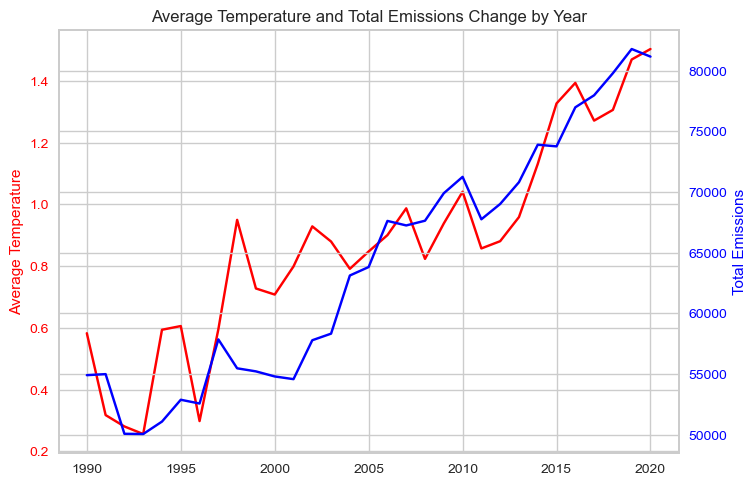

In [99]:
temperature_emission_year = emission_df.groupby('Year')[['Average Temperature', 'total_emission']].mean()


fig, ax1 = plt.subplots()

ax1.plot(temperature_emission_year.index, temperature_emission_year['Average Temperature'], color='red', label='Average Temperature')
ax1.set_ylabel('Average Temperature', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(temperature_emission_year.index, temperature_emission_year['total_emission'], color='blue', label='Total Emissions')
ax2.set_ylabel('Total Emissions', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Temperature and Total Emissions Change by Year')
plt.xlabel('Year')
plt.show()

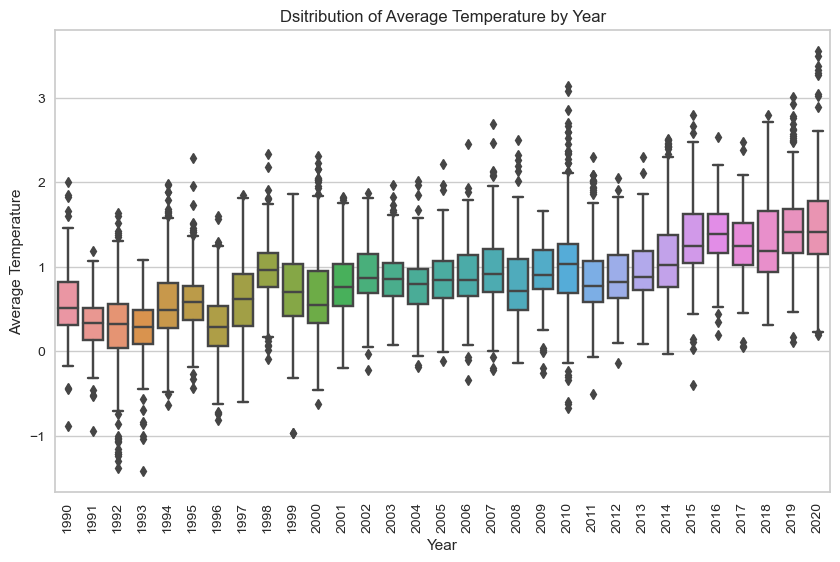

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Year', y='Average Temperature', data=emission_df)

plt.title('Dsitribution of Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.xticks(rotation=90)

plt.show()

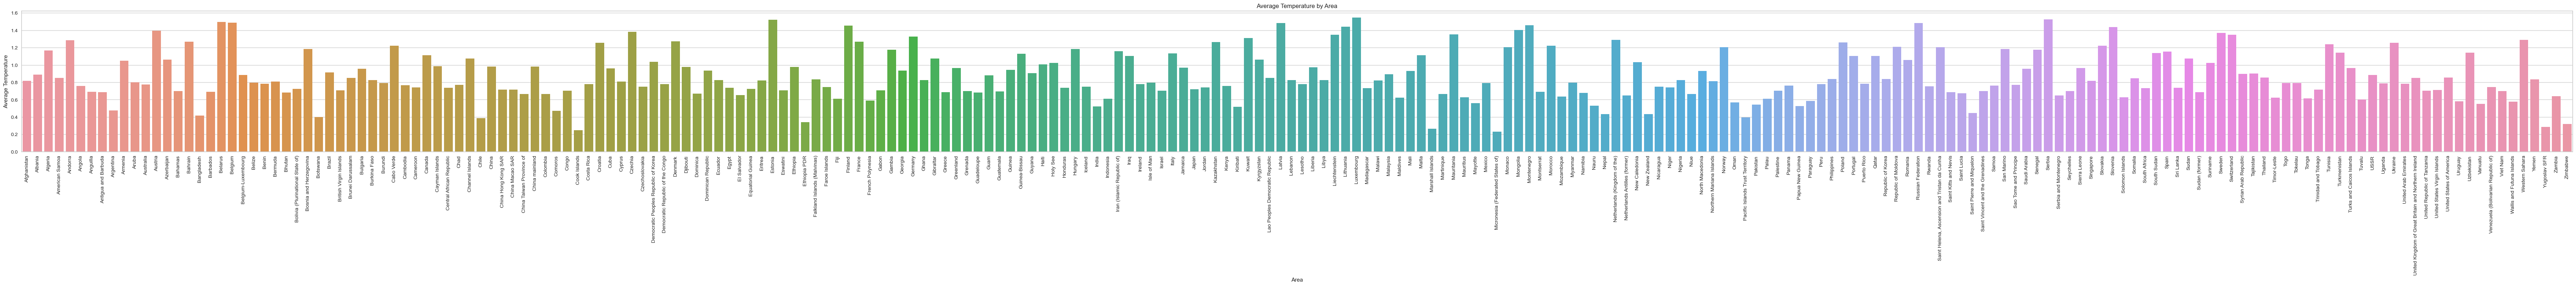

In [101]:
emission_temperature_area = emission_df.groupby('Area')[['Average Temperature', 'total_emission']].mean().reset_index()

plt.figure(figsize=(90,5))
sns.barplot(x='Area', y='Average Temperature', data=emission_temperature_area)

plt.title('Average Temperature by Area')
plt.xlabel('Area')
plt.ylabel('Average Temperature')
plt.xticks(rotation=90)

plt.show()

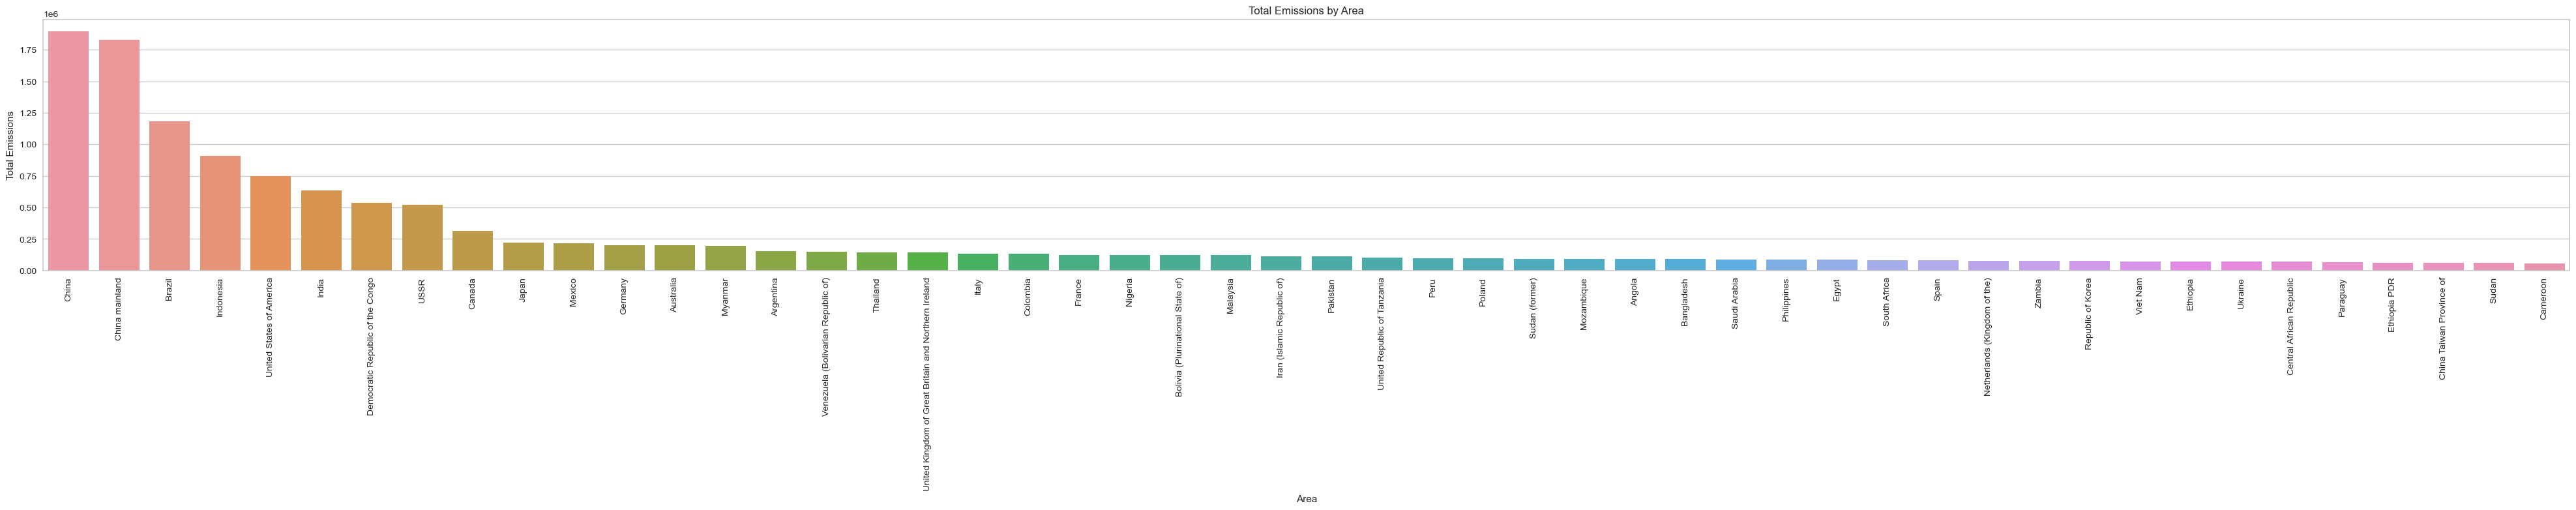

In [102]:
emission_sorted = emission_temperature_area.sort_values('total_emission', ascending=False).head(50)

plt.figure(figsize=(50,5))
sns.barplot(x='Area', y='total_emission', data=emission_sorted)

plt.title('Total Emissions by Area')
plt.xlabel('Area')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)

plt.show()

Verify data quality

In [103]:
emission_df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [104]:
# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply the function to each column
outliers1 = emission_df.select_dtypes(exclude='object').apply(detect_outliers)
# Now, 'outliers' is a DataFrame with True/False indicating outliers
outliers1

Year  Savanna fires  Forest fires  Crop Residues  Rice Cultivation  \
0     False          False         False          False             False   
1     False          False         False          False             False   
2     False          False         False          False             False   
3     False          False         False          False             False   
4     False          False         False          False             False   
...     ...            ...           ...            ...               ...   
6960  False           True          True          False             False   
6961  False           True         False          False             False   
6962  False           True          True          False             False   
6963  False           True          True          False             False   
6964  False           True         False          False             False   

      Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                           False                     False           False   
1                           False                     False           False   
2                           False                     False           False   
3                           False                     False           False   
4                           False                     False           False   
...                           ...                       ...             ...   
6960                        False                     False           False   
6961                        False                     False           False   
6962                        False                     False           False   
6963                        False                     False           False   
6964                        False                     False           False   

      Forestland  Net Forest conversion  ...  Fertilizers Manufacturing  \
0          False                  False  ...                      False   
1          False                  False  ...                      False   
2          False                  False  ...                      False   
3          False                  False  ...                      False   
4          False                  False  ...                      False   
...          ...                    ...  ...                        ...   
6960        True                  False  ...                      False   
6961        True                  False  ...                      False   
6962        True                  False  ...                      False   
6963        True                  False  ...                      False   
6964        True                  False  ...                      False   

       IPPU  Manure applied to Soils  Manure left on Pasture  \
0     False                    False                   False   
1     False                    False                   False   
2     False                    False                   False   
3     False                    False                   False   
4     False                    False                   False   
...     ...                      ...                     ...   
6960  False                    False                   False   
6961  False                    False                   False   
6962  False                    False                   False   
6963  False                    False                   False   
6964  False                    False                   False   

      Manure Management  Fires in organic soils  \
0                 False                   False   
1                 False                   False   
2                 False                   False   
3                 False                   False   
4                 False                   False   
...                 ...                     ...   
6960              False                   False   
6961              False                   False   
6962

### 03-Data preparation
Data cleaning - Handling missing values

In [105]:
import warnings
warnings.filterwarnings("ignore")

# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [106]:
cols_to_impute = ['Savanna fires', 'Forest fires', 'Crop Residues',
                  'Rice Cultivation', 'Drained organic soils (CO2)',
                  'Pesticides Manufacturing', 'Food Transport', 'Forestland',
                  'Net Forest conversion', 'Food Household Consumption', 
                  'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
                  'Agrifood Systems Waste Disposal', 'Food Processing',
                  'Fertilizers Manufacturing', 'IPPU', 
                  'Manure applied to Soils', 'Manure left on Pasture', 
                  'Manure Management', 'Fires in organic soils',
                  'Fires in humid tropical forests', 'On-farm energy use']

mice_imputer = IterativeImputer()
emission_df[cols_to_impute] = mice_imputer.fit_transform(emission_df[cols_to_impute])
emission_df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
total_emission                     0
Average Temperature                0
d

Contruct data

In [107]:
emission_df['Updated_total_emission'] = emission_df.loc[:, 'Savanna fires':'On-farm energy use'].sum(axis=1)
emission_df

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...      IPPU  Manure applied to Soils  \
0            63.1152  -2388.8030  ...  209.9778                 260.1431   
1            61.2125  -2388.8030  ...  217.0388                 268.6292   
2            53.3170  -2388.8030  ...  222.1156                 264.7898   
3            54.3617  -2388.8030  ...  201.2057                 261.7221   
4            53.9874  -2388.8030  ...  182.2905                 267.6219   
...              ...         ...  ...       ...                      ...   
6960        251.1465  76500.2982  ...  858.9820                  96.1332   
6961        255.7975  76500.2982  ...  889.4250                  81.2314   
6962        327.0897  76500.2982  ...  966.2650                  81.0712   
6963        290.1893  76500.2982  ...  945.9420                  85.7211   
6964        238.7639  76500.2982  ...  940.4200                  85.3143   

      Manure left on Pasture  Manure Management  Fires in organic soils  \
0                  1590.5319           319.1763                     0.0   
1                  1657.2364           342.3079                     0.0   
2                  1653.5068           349.1224                     0.0   
3                  1642.9623           352.2947                     0.0   
4                  1689.3593           367.6784                     0.0   
...                      ...                ...                     ...   
6960               2721.1459           282.5994                     0.0   
6961               2744.8763           255.5900                     0.0   
6962               2790.0949           257.2735                     0.0   
6963               2828.7215           267.5224                     0.0   
6964               2829.7457           266.7316                     0.0   

      Fires in humid tropical forests  On-farm energy use  total_emission  \
0                                 0.0          313.133908     2198.963539   
1                                 0.0          332.517903     2323.876629   
2                                 0.0          292.215672     2356.304229   
3                                 0.0          288.385814     236

In [108]:
round(emission_df.describe().transpose(), 2)

count      mean        std        min  \
Year                             6965.0   2005.12       8.89    1990.00   
Savanna fires                    6965.0   1198.81    5236.92       0.00   
Forest fires                     6965.0    914.37    3695.46       0.00   
Crop Residues                    6965.0    826.66    3330.23    -167.54   
Rice Cultivation                 6965.0   4259.67   17613.83       0.00   
Drained organic soils (CO2)      6965.0   3503.23   15861.45       0.00   
Pesticides Manufacturing         6965.0    333.42    1429.16       0.00   
Food Transport                   6965.0   1939.58    5616.75       0.00   
Forestland                       6965.0 -16589.28   79024.82 -797183.08   
Net Forest conversion            6965.0  16936.27   97781.73  -26427.25   
Food Household Consumption       6965.0   4600.31   24916.47   -1149.61   
Food Retail                      6965.0   2043.21    8494.25       0.00   
On-farm Electricity Use          6965.0   1626.68    9343.18       0.00   
Food Packaging                   6965.0   1658.63   11481.34       0.00   
Agrifood Systems Waste Disposal  6965.0   6018.44   22156.74       0.34   
Food Processing                  6965.0   3872.72   19838.22       0.00   
Fertilizers Manufacturing        6965.0   3035.72   11693.03       0.00   
IPPU                             6965.0  18288.54  105440.77   -2196.63   
Manure applied to Soils          6965.0    831.84    3013.63       0.05   
Manure left on Pasture           6965.0   3518.03    9103.56       0.00   
Manure Management                6965.0   2053.60    7450.28       0.43   
Fires in organic soils           6965.0   1210.32   22669.85       0.00   
Fires in humid tropical forests  6965.0    655.91    3229.50    -254.46   
On-farm energy use               6965.0   2680.23   11781.20   -4898.75   
total_emission                   6965.0  64091.24  228312.96 -391884.06   
Average Temperature              6965.0      0.87       0.56      -1.42   
Updated_total_emission           6965.0  65416.91  228088.98 -391884.06   

                                     25%       50%       75%         max  
Year                             1997.00   2005.00   2013.00     2020.00  
Savanna fires                       0.00      1.69    122.69   114616.40  
Forest fires                        0.00      0.65     78.06    52227.63  
Crop Residues                       9.04    104.82    325.03    33490.07  
Rice Cultivation                  181.26    534.82   1536.64   164915.26  
Drained organic soils (CO2)         0.00      0.00    690.41   241025.07  
Pesticides Manufacturing            6.00     13.00    116.33    16459.00  
Food Transport                     27.96    204.96   1207.00    67945.76  
Forestland                      -3224.37    -58.90      0.00   171121.08  
Net Forest conversion               0.00     30.14   5456.22  1605106.10  
Food Household Consumption         12.87    203.48   1425.89   466288.20  
Food Retail                        26.82    172.04   1076.00   133784.07  
On-farm Electricity Use             8.04     29.12    499.94   165676.30  
Food Packaging                     67.63     74.02    281.79   175741.31  
Agrifood Systems Waste Disposal    86.68    901.28   3006.44   213289.70  
Food Processing                   209.59    344.76   1236.91   274253.51  
Fertilizers Manufacturing         360.36   1115.05   2024.87   170826.42  
IPPU                               43.30    859.11   6030.74  1861640.66  
Manure applied to Soils            23.12    157.74    393.30    34677.36  
Manure left on Pasture            139.67    972.57   2430.79    92630.76  
Manure Management                  52.71    378.08   1059.91    70592.65  
Fires in organic soils              0.00      0.00      0.00   991717.54  
Fires in humid tropical forests     0.00      0.00     14.30    51771.26  
On-farm energy use                 11.47    169.06   1215.92   248879.18  
total_emission                   5221.24  12147.65  35139.

In [109]:
# emission_df['Drained organic soils (CO2)_cat'] = np.where(emission_df['Drained organic soils (CO2)']==0,0,1)
# emission_df['Fires in organic soils_cat'] = np.where(emission_df['Fires in organic soils']==0,0,1)
# emission_df['Fires in humid tropical forests_cat'] = np.where(emission_df['Fires in humid tropical forests']==0,0,1)

In [110]:
# cols_to_plot = ['Drained organic soils (CO2)_cat', 'Fires in organic soils_cat', 'Fires in humid tropical forests_cat']

# fig, axs = plt.subplots(1, 3, figsize=(20,4))

# for i, col in enumerate(cols_to_plot):
#     value_counts = emission_df[col].value_counts()

#     axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
#     axs[i].set_title(f'Distribution of {col}')

# plt.tight_layout()
# plt.show()

Integrate various data resources

In [111]:
agrifood_emission_df = emission_df.merge(population_df, on=['Area', 'Year', 'total_emission', 'Average Temperature'])
agrifood_emission_df


Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...  Fires in organic soils  \
0            63.1152  -2388.8030  ...                     0.0   
1            61.2125  -2388.8030  ...                     0.0   
2            53.3170  -2388.8030  ...                     0.0   
3            54.3617  -2388.8030  ...                     0.0   
4            53.9874  -2388.8030  ...                     0.0   
...              ...         ...  ...                     ...   
6960        251.1465  76500.2982  ...                     0.0   
6961        255.7975  76500.2982  ...                     0.0   
6962        327.0897  76500.2982  ...                     0.0   
6963        290.1893  76500.2982  ...                     0.0   
6964        238.7639  76500.2982  ...                     0.0   

      Fires in humid tropical forests  On-farm energy use  total_emission  \
0                                 0.0          313.133908     2198.963539   
1                                 0.0          332.517903     2323.876629   
2                                 0.0          292.215672     2356.304229   
3                                 0.0          288.385814     2368.470529   
4                                 0.0          309.629350     2500.768729   
...                               ...                 ...             ...   
6960                              0.0          417.315000    98491.026350   
6961                              0.0          398.164400    97159.311550   
6962                              0.0          465.773500    97668.308200   
6963                              0.0          444.233500    98988.062800   
6964                              0.0          444.233500    96505.221850   

      Average Temperature  Updated_total_emission  Rural population  \
0                0.536167             2512.097448           9655167   
1                0.020667             2656.394532          10230490   
2               -0.259583             2648.519901          10995568   
3                0.101917             2656.856343          11858090   
4                0.372250             2810.398080          12690115   
...                   ...                     ...      

In [112]:
agrifood_emission_df['Total_population'] = agrifood_emission_df['Total Population - Female'] + agrifood_emission_df['Total Population - Male']
agrifood_emission_df['Emission_per_capita'] = agrifood_emission_df['Updated_total_emission'] / agrifood_emission_df['Total_population']
agrifood_emission_df

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...  On-farm energy use  total_emission  \
0            63.1152  -2388.8030  ...          313.133908     2198.963539   
1            61.2125  -2388.8030  ...          332.517903     2323.876629   
2            53.3170  -2388.8030  ...          292.215672     2356.304229   
3            54.3617  -2388.8030  ...          288.385814     2368.470529   
4            53.9874  -2388.8030  ...          309.629350     2500.768729   
...              ...         ...  ...                 ...             ...   
6960        251.1465  76500.2982  ...          417.315000    98491.026350   
6961        255.7975  76500.2982  ...          398.164400    97159.311550   
6962        327.0897  76500.2982  ...          465.773500    97668.308200   
6963        290.1893  76500.2982  ...          444.233500    98988.062800   
6964        238.7639  76500.2982  ...          444.233500    96505.221850   

      Average Temperature  Updated_total_emission  Rural population  \
0                0.536167             2512.097448           9655167   
1                0.020667             2656.394532          10230490   
2               -0.259583             2648.519901          10995568   
3                0.101917             2656.856343          11858090   
4                0.372250             2810.398080          12690115   
...                   ...                     ...               ...   
6960             1.120250            98491.026347          10934468   
6961             0.046500            97159.311553          11201138   
6962             0.516333            97668.308205          11465748   
6963             0.985667            98988.062799          11725970   
6964             0.189000            96505.221853          11980005   

      Urban population  Total Population - Male  Total Population - Female  \
0              2593947                5348387.0                  5346409.0   
1              2763167                5372959.0                  5372208.0   
2              2985663                6028494.0                  6028939.0   
3              3237009                7003641.0                  7000119.0   
4              3482

In [113]:
agrifood_emission_df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
total_emission                     0
Average Temperature                0
U

In [114]:
outliers2 = agrifood_emission_df.select_dtypes(exclude='object').apply(detect_outliers)
outliers2

Year  Savanna fires  Forest fires  Crop Residues  Rice Cultivation  \
0     False          False         False          False             False   
1     False          False         False          False             False   
2     False          False         False          False             False   
3     False          False         False          False             False   
4     False          False         False          False             False   
...     ...            ...           ...            ...               ...   
6960  False           True          True          False             False   
6961  False           True         False          False             False   
6962  False           True          True          False             False   
6963  False           True         False          False             False   
6964  False           True         False          False             False   

      Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                           False                     False           False   
1                           False                     False           False   
2                           False                     False           False   
3                           False                     False           False   
4                           False                     False           False   
...                           ...                       ...             ...   
6960                        False                     False           False   
6961                        False                     False           False   
6962                        False                     False           False   
6963                        False                     False           False   
6964                        False                     False           False   

      Forestland  Net Forest conversion  ...  On-farm energy use  \
0          False                  False  ...               False   
1          False                  False  ...               False   
2          False                  False  ...               False   
3          False                  False  ...               False   
4          False                  False  ...               False   
...          ...                    ...  ...                 ...   
6960        True                  False  ...               False   
6961        True                  False  ...               False   
6962        True                  False  ...               False   
6963        True                  False  ...               False   
6964        True                  False  ...               False   

      total_emission  Average Temperature  Updated_total_emission  \
0              False                False                   False   
1              False                False                   False   
2              False                False                   False   
3              False                False                   False   
4              False                False                   False   
...              ...                  ...                     ...   
6960            True                False                   False   
6961            True                False                   False   
6962            True                False                   False   
6963            True                False                   False   
6964            True                False                   False   

      Rural population  Urban population  Total Population - Male  \
0                False             False                    False   
1                False             False                    False   
2                False             False                    False   
3                False             False                    False   
4                False             False                    False   
...                ...               ...                      ...   
6960

In [115]:
# for col in outliers2.columns:
#     unique_values = outliers2[col].value_counts()
#     print(f'{col}: \n{unique_values}\n')

### 04-Data transformation
Feature selection

<Axes: >

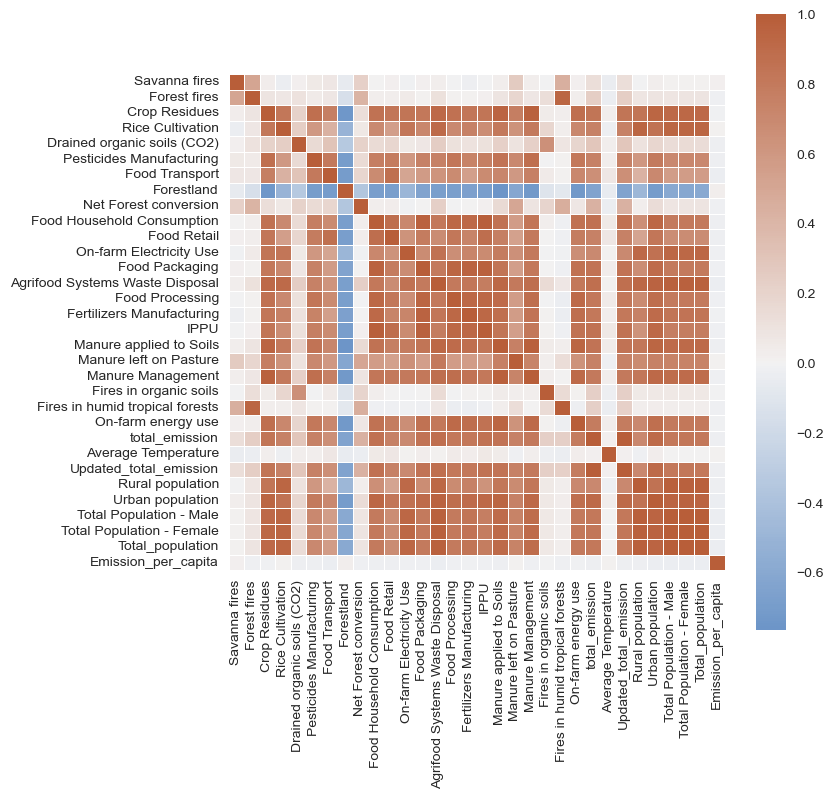

In [116]:
cols = ['Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'total_emission', 'Average Temperature', 'Updated_total_emission',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'Total_population', 'Emission_per_capita']

# Correlation Heatmap
corr = agrifood_emission_df[cols].corr()
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5)

In [117]:
print(agrifood_emission_df.info(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6965 non-null   float64
 3   Forest fires                     6965 non-null   float64
 4   Crop Residues                    6965 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6965 non-null   float64
 10  Net Forest conversion            6965 non-null   float64
 11  Food Household Consumption       6965 non-null   float64
 12  Food Retail         

In [118]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, mutual_info_regression

# Assuming X contains both categorical and numerical features
agrifood_emission_df1 = agrifood_emission_df.copy()
X = agrifood_emission_df1.drop(['Area', 'Year', 'Average Temperature'], axis=1)
y = agrifood_emission_df1['Average Temperature']

# Select 20 best variables using ANOVA
selector = SelectKBest(mutual_info_regression, k=20)
selector.fit(X, y)

support = selector.get_support()
features = X.loc[:,support].columns.tolist()

print(features)

['Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing', 'Food Transport', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Agrifood Systems Waste Disposal', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use', 'Updated_total_emission', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'Total_population', 'Emission_per_capita']


Data scaling

In [119]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
agrifood_emission_df2 = agrifood_emission_df.copy()
scaled_columns = agrifood_emission_df2[['Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing', 'Food Transport', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Agrifood Systems Waste Disposal', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use', 'Updated_total_emission', 'Urban population', 'Total_population', 'Emission_per_capita']]
# numeric_columns = agrifood_emission_df2.select_dtypes(include=[np.number])
scaler.fit(scaled_columns)
scaled_data = scaler.transform(scaled_columns)
scaled_df = pd.DataFrame(scaled_data, columns=scaled_columns.columns)

scaled_df


Crop Residues  Rice Cultivation  Pesticides Manufacturing  \
0          0.318966          0.111543                 -0.010809   
1          0.331274          0.105758                 -0.011674   
2          0.290251          0.111543                 -0.011674   
3          0.398746          0.111543                 -0.011674   
4          0.434291          0.126004                 -0.011674   
...             ...               ...                       ...   
6960      -0.107195         -0.389123                  0.561973   
6961       0.012052         -0.388726                  0.489461   
6962       0.016348         -0.388583                  0.480397   
6963      -0.187855         -0.388810                  0.543845   
6964       0.011027         -0.388706                  0.543845   

      Food Transport  Net Forest conversion  Food Household Consumption  \
0          -0.120307              -0.005524                   -0.088036   
1          -0.121921              -0.005524                   -0.087042   
2          -0.128618              -0.005524                   -0.086844   
3          -0.127732              -0.005524                   -0.083802   
4          -0.128049              -0.005524                   -0.081156   
...              ...                    ...                         ...   
6960        0.039171               1.948657                    0.033819   
6961        0.043115               1.948657                   -0.000253   
6962        0.103581               1.948657                    0.005430   
6963        0.072285               1.948657                    0.017804   
6964        0.028668               1.948657                    0.007389   

      Food Retail  On-farm Electricity Use  Agrifood Systems Waste Disposal  \
0       -0.059473                -0.030197                        -0.071748   
1       -0.052769                -0.035987                        -0.065229   
2       -0.043720                -0.040344                        -0.053977   
3       -0.086336                -0.040774                        -0.037452   
4       -0.077815                -0.042131                        -0.023755   
...           ...                      ...                              ...   
6960     0.258339                 0.811768                         0.060266   
6961     0.260532                 0.560400                         0.065782   
6962     0.305779                 0.645916                         0.070991   
6963     0.353180                 0.652758                         0.075366   
6964     0.377439                 0.652758                         0.079763   

          IPPU  Manure applied to Soils  Manure left on Pasture  \
0    -0.108416                 0.276634                0.269721   
1    -0.107237                 0.299558                0.298836   
2    -0.106389                 0.289186                0.297208   
3    -0.109881                 0.280899                0.292605   
4    -0.113040                 0.296837                0.312856   
...        ...                      ...                     ...   
6960 -0.000022                -0.166417                0.763197   
6961  0.005063                -0.206672                0.773555   
6962  0.017896                -0.207105                0.793291   
6963  0.014502                -0.194544                0.810150   
6964  0.013580                -0.195642                0.810597   

      Manure Management  On-farm energy use  Updated_total_emission  \
0             -0.058480            0.119616               -0.293009   
1             -0.035514            0.135709               -0.289349   
2             -0.028748            0.102248               -0.289549   
3             -0.025598            0.099069               -0.289338   
4             -0.010325            0.116706               -0.285444   
...                 ...                 ...                     ...   
6960          -0.094795            0.206113      

In [120]:
df = agrifood_emission_df[['Area', 'Year', 'Average Temperature']]
agrifood_dm_df = pd.concat([df, scaled_df], axis=1)
agrifood_dm_df

Area  Year  Average Temperature  Crop Residues  Rice Cultivation  \
0     Afghanistan  1990             0.536167       0.318966          0.111543   
1     Afghanistan  1991             0.020667       0.331274          0.105758   
2     Afghanistan  1992            -0.259583       0.290251          0.111543   
3     Afghanistan  1993             0.101917       0.398746          0.111543   
4     Afghanistan  1994             0.372250       0.434291          0.126004   
...           ...   ...                  ...            ...               ...   
6960     Zimbabwe  2016             1.120250      -0.107195         -0.389123   
6961     Zimbabwe  2017             0.046500       0.012052         -0.388726   
6962     Zimbabwe  2018             0.516333       0.016348         -0.388583   
6963     Zimbabwe  2019             0.985667      -0.187855         -0.388810   
6964     Zimbabwe  2020             0.189000       0.011027         -0.388706   

      Pesticides Manufacturing  Food Transport  Net Forest conversion  \
0                    -0.010809       -0.120307              -0.005524   
1                    -0.011674       -0.121921              -0.005524   
2                    -0.011674       -0.128618              -0.005524   
3                    -0.011674       -0.127732              -0.005524   
4                    -0.011674       -0.128049              -0.005524   
...                        ...             ...                    ...   
6960                  0.561973        0.039171               1.948657   
6961                  0.489461        0.043115               1.948657   
6962                  0.480397        0.103581               1.948657   
6963                  0.543845        0.072285               1.948657   
6964                  0.543845        0.028668               1.948657   

      Food Household Consumption  Food Retail  ...  \
0                      -0.088036    -0.059473  ...   
1                      -0.087042    -0.052769  ...   
2                      -0.086844    -0.043720  ...   
3                      -0.083802    -0.086336  ...   
4                      -0.081156    -0.077815  ...   
...                          ...          ...  ...   
6960                    0.033819     0.258339  ...   
6961                   -0.000253     0.260532  ...   
6962                    0.005430     0.305779  ...   
6963                    0.017804     0.353180  ...   
6964                    0.007389     0.377439  ...   

      Agrifood Systems Waste Disposal      IPPU  Manure applied to Soils  \
0                           -0.071748 -0.108416                 0.276634   
1                           -0.065229 -0.107237                 0.299558   
2                           -0.053977 -0.106389                 0.289186   
3                           -0.037452 -0.109881                 0.280899   
4                           -0.023755 -0.113040                 0.296837   
...                               ...       ...                      ...   
6960                         0.060266 -0.000022                -0.166417   
6961                         0.065782  0.005063                -0.206672   
6962                         0.070991  0.017896                -0.207105   
6963                         0.075366  0.014502                -0.194544   
6964                         0.079763  0.013580                -0.195642   

      Manure left on Pasture  Manure Management  On-farm energy use  \
0                   0.269721          -0.058480            0.119616   
1                   0.298836          -0.035514            0.135709   
2                   0.297208          -0.028748            0.102248   
3                   0.292605          -0.025598            0.099069   
4                   0.312856          -0.010325            0.116706   
...                      ...                ...                 ...   
6960                0.763197          -0.094795            0.206113   
6961                0.773555     

### 05-Data mining methods selection
Examine the correlation between carbon dioxide (CO2) emissions within the agri-food sector and the subsequent temperature rise:<br> regression analysis is utilised to investigate the association between carbon dioxide (CO2) emissions and the increase in temperature. This methodology facilitates the assessment of the magnitude and orientation of the association between the variables mentioned above.
<br><br>
Analyse the influence of various countries based on aggregated data on emissions and temperature change: <br>clustering techniques is utilised to categorise countries according to their emissions and temperature change data. This approach enables the identification of patterns and trends within the dataset, facilitating a comprehensive comprehension of the various countries' contributions to emissions and temperature fluctuations.
<br><br>
Identify the countries with the highest temperature increase and analyse their contributions to the overall environmental impact:<br> descriptive statistics is utilised to ascertain the nations exhibiting the greatest per capita emissions. After identifying these countries, decision tree analysis is used to gain insights into their contributions to the overall environmental impact.

### 06-Data mining algorithms selection
Load relevant algorithms

In [121]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 
from yellowbrick.cluster import KElbowVisualizer

### 07-Data mining
Regression

In [122]:
agrifood_dm_df1 = agrifood_dm_df.copy()

columns_to_labelencode = ['Area', 'Year']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in columns_to_labelencode:
    agrifood_dm_df1[column] = label_encoder.fit_transform(agrifood_dm_df1[column])

agrifood_dm_df1

Area  Year  Average Temperature  Crop Residues  Rice Cultivation  \
0        0     0             0.536167       0.318966          0.111543   
1        0     1             0.020667       0.331274          0.105758   
2        0     2            -0.259583       0.290251          0.111543   
3        0     3             0.101917       0.398746          0.111543   
4        0     4             0.372250       0.434291          0.126004   
...    ...   ...                  ...            ...               ...   
6960   235    26             1.120250      -0.107195         -0.389123   
6961   235    27             0.046500       0.012052         -0.388726   
6962   235    28             0.516333       0.016348         -0.388583   
6963   235    29             0.985667      -0.187855         -0.388810   
6964   235    30             0.189000       0.011027         -0.388706   

      Pesticides Manufacturing  Food Transport  Net Forest conversion  \
0                    -0.010809       -0.120307              -0.005524   
1                    -0.011674       -0.121921              -0.005524   
2                    -0.011674       -0.128618              -0.005524   
3                    -0.011674       -0.127732              -0.005524   
4                    -0.011674       -0.128049              -0.005524   
...                        ...             ...                    ...   
6960                  0.561973        0.039171               1.948657   
6961                  0.489461        0.043115               1.948657   
6962                  0.480397        0.103581               1.948657   
6963                  0.543845        0.072285               1.948657   
6964                  0.543845        0.028668               1.948657   

      Food Household Consumption  Food Retail  ...  \
0                      -0.088036    -0.059473  ...   
1                      -0.087042    -0.052769  ...   
2                      -0.086844    -0.043720  ...   
3                      -0.083802    -0.086336  ...   
4                      -0.081156    -0.077815  ...   
...                          ...          ...  ...   
6960                    0.033819     0.258339  ...   
6961                   -0.000253     0.260532  ...   
6962                    0.005430     0.305779  ...   
6963                    0.017804     0.353180  ...   
6964                    0.007389     0.377439  ...   

      Agrifood Systems Waste Disposal      IPPU  Manure applied to Soils  \
0                           -0.071748 -0.108416                 0.276634   
1                           -0.065229 -0.107237                 0.299558   
2                           -0.053977 -0.106389                 0.289186   
3                           -0.037452 -0.109881                 0.280899   
4                           -0.023755 -0.113040                 0.296837   
...                               ...       ...                      ...   
6960                         0.060266 -0.000022                -0.166417   
6961                         0.065782  0.005063                -0.206672   
6962                         0.070991  0.017896                -0.207105   
6963                         0.075366  0.014502                -0.194544   
6964                         0.079763  0.013580                -0.195642   

      Manure left on Pasture  Manure Management  On-farm energy use  \
0                   0.269721          -0.058480            0.119616   
1                   0.298836          -0.035514            0.135709   
2                   0.297208          -0.028748            0.102248   
3                   0.292605          -0.025598            0.099069   
4                   0.312856          -0.010325            0.116706   
...                      ...                ...                 ...   
6960                0.763197          -0.094795            0.206113   
6961                0.773555          -0.121611            0.190213   
6962                0.793291          -

In [123]:
Y = agrifood_dm_df1['Average Temperature']
X = agrifood_dm_df1.drop(['Average Temperature'], axis=1)

X_all = X.values
y = Y.values
r1 = LinearRegression().fit(X_all, y)
print(r1.intercept_, r1.coef_)
r1.score(X_all, y)


0.3728338709365958 [-2.32031657e-04  3.48712040e-02  6.31184275e-04 -4.01469024e-03
 -4.76076315e-03  1.43087991e-02  1.83365665e-03  2.93440912e-03
 -1.01028384e-02  1.98179995e-03  1.13741316e-02  4.05738695e-03
  2.14144675e-02 -2.04033198e-02  5.68584372e-03 -1.44822104e-03
 -1.29411939e-02 -1.21596444e-02 -1.05432968e-02  2.84857910e-05]


0.32382836946269233

In [124]:
agrifood_dm_df1['Pred_r1'] = r1.predict(X_all)
agrifood_dm_df1

Area  Year  Average Temperature  Crop Residues  Rice Cultivation  \
0        0     0             0.536167       0.318966          0.111543   
1        0     1             0.020667       0.331274          0.105758   
2        0     2            -0.259583       0.290251          0.111543   
3        0     3             0.101917       0.398746          0.111543   
4        0     4             0.372250       0.434291          0.126004   
...    ...   ...                  ...            ...               ...   
6960   235    26             1.120250      -0.107195         -0.389123   
6961   235    27             0.046500       0.012052         -0.388726   
6962   235    28             0.516333       0.016348         -0.388583   
6963   235    29             0.985667      -0.187855         -0.388810   
6964   235    30             0.189000       0.011027         -0.388706   

      Pesticides Manufacturing  Food Transport  Net Forest conversion  \
0                    -0.010809       -0.120307              -0.005524   
1                    -0.011674       -0.121921              -0.005524   
2                    -0.011674       -0.128618              -0.005524   
3                    -0.011674       -0.127732              -0.005524   
4                    -0.011674       -0.128049              -0.005524   
...                        ...             ...                    ...   
6960                  0.561973        0.039171               1.948657   
6961                  0.489461        0.043115               1.948657   
6962                  0.480397        0.103581               1.948657   
6963                  0.543845        0.072285               1.948657   
6964                  0.543845        0.028668               1.948657   

      Food Household Consumption  Food Retail  ...      IPPU  \
0                      -0.088036    -0.059473  ... -0.108416   
1                      -0.087042    -0.052769  ... -0.107237   
2                      -0.086844    -0.043720  ... -0.106389   
3                      -0.083802    -0.086336  ... -0.109881   
4                      -0.081156    -0.077815  ... -0.113040   
...                          ...          ...  ...       ...   
6960                    0.033819     0.258339  ... -0.000022   
6961                   -0.000253     0.260532  ...  0.005063   
6962                    0.005430     0.305779  ...  0.017896   
6963                    0.017804     0.353180  ...  0.014502   
6964                    0.007389     0.377439  ...  0.013580   

      Manure applied to Soils  Manure left on Pasture  Manure Management  \
0                    0.276634                0.269721          -0.058480   
1                    0.299558                0.298836          -0.035514   
2                    0.289186                0.297208          -0.028748   
3                    0.280899                0.292605          -0.025598   
4                    0.296837                0.312856          -0.010325   
...                       ...                     ...                ...   
6960                -0.166417                0.763197          -0.094795   
6961                -0.206672                0.773555          -0.121611   
6962                -0.207105                0.793291          -0.119940   
6963                -0.194544                0.810150          -0.109764   
6964                -0.195642                0.810597          -0.110549   

      On-farm energy use  Updated_total_emission  Urban population  \
0               0.119616               -0.293009          0.029327   
1               0.135709               -0.289349          0.050322   
2               0.102248               -0.289549          0.077928   
3               0.099069               -0.289338          0.109114   
4               0.116706               -0.285444          0.139586   
...                  ...                     ...               ...   
6960            0.206113                2.141051          0.354641  

In [125]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
r2 = LinearRegression().fit(X_train, Y_train)
print(r2.intercept_, r2.coef_)
r2.score(X_train, Y_train)
r2.score(X_test, Y_test)

0.3809678686481008 [-2.78258368e-04  3.46403065e-02 -4.34439848e-03 -2.66786434e-03
 -4.39026457e-03  1.19185724e-02  2.00958832e-03  3.10091777e-03
 -6.83829477e-03  3.79035189e-03  1.85843325e-02  4.95600166e-03
  1.84502916e-02 -1.69390239e-02  9.86127545e-03 -1.15346065e-03
 -1.60204752e-02 -1.57343546e-02 -1.80713707e-02  3.87955204e-05]


0.33397962802359205

In [126]:
agrifood_dm_df1['Pred_r2']=r2.predict(X)
agrifood_dm_df1

Area  Year  Average Temperature  Crop Residues  Rice Cultivation  \
0        0     0             0.536167       0.318966          0.111543   
1        0     1             0.020667       0.331274          0.105758   
2        0     2            -0.259583       0.290251          0.111543   
3        0     3             0.101917       0.398746          0.111543   
4        0     4             0.372250       0.434291          0.126004   
...    ...   ...                  ...            ...               ...   
6960   235    26             1.120250      -0.107195         -0.389123   
6961   235    27             0.046500       0.012052         -0.388726   
6962   235    28             0.516333       0.016348         -0.388583   
6963   235    29             0.985667      -0.187855         -0.388810   
6964   235    30             0.189000       0.011027         -0.388706   

      Pesticides Manufacturing  Food Transport  Net Forest conversion  \
0                    -0.010809       -0.120307              -0.005524   
1                    -0.011674       -0.121921              -0.005524   
2                    -0.011674       -0.128618              -0.005524   
3                    -0.011674       -0.127732              -0.005524   
4                    -0.011674       -0.128049              -0.005524   
...                        ...             ...                    ...   
6960                  0.561973        0.039171               1.948657   
6961                  0.489461        0.043115               1.948657   
6962                  0.480397        0.103581               1.948657   
6963                  0.543845        0.072285               1.948657   
6964                  0.543845        0.028668               1.948657   

      Food Household Consumption  Food Retail  ...  Manure applied to Soils  \
0                      -0.088036    -0.059473  ...                 0.276634   
1                      -0.087042    -0.052769  ...                 0.299558   
2                      -0.086844    -0.043720  ...                 0.289186   
3                      -0.083802    -0.086336  ...                 0.280899   
4                      -0.081156    -0.077815  ...                 0.296837   
...                          ...          ...  ...                      ...   
6960                    0.033819     0.258339  ...                -0.166417   
6961                   -0.000253     0.260532  ...                -0.206672   
6962                    0.005430     0.305779  ...                -0.207105   
6963                    0.017804     0.353180  ...                -0.194544   
6964                    0.007389     0.377439  ...                -0.195642   

      Manure left on Pasture  Manure Management  On-farm energy use  \
0                   0.269721          -0.058480            0.119616   
1                   0.298836          -0.035514            0.135709   
2                   0.297208          -0.028748            0.102248   
3                   0.292605          -0.025598            0.099069   
4                   0.312856          -0.010325            0.116706   
...                      ...                ...                 ...   
6960                0.763197          -0.094795            0.206113   
6961                0.773555          -0.121611            0.190213   
6962                0.793291          -0.119940            0.246345   
6963                0.810150          -0.109764            0.228462   
6964                0.810597          -0.110549            0.228462   

      Updated_total_emission  Urban population  Total_population  \
0                  -0.293009          0.029327          0.326378   
1                  -0.289349          0.050322          0.329213   
2                  -0.289549          0.077928          0.403063   
3                  -0.289338          0.109114          0.512595   
4                  -0.285444          0.139586          0.594297   
...                      ...  

In [127]:
SelectKBest(f_regression, k=10).fit(X, Y).get_feature_names_out()

array(['Year', 'Crop Residues', 'Food Transport',
       'Food Household Consumption', 'Food Retail', 'IPPU',
       'Manure applied to Soils', 'Manure Management',
       'On-farm energy use', 'Urban population'], dtype=object)

In [128]:
X_1 = X[['Year', 'Crop Residues', 'Food Transport',
       'Food Household Consumption', 'Food Retail', 'IPPU',
       'Manure applied to Soils', 'Manure Management',
       'On-farm energy use', 'Urban population']]
r3 = LinearRegression().fit(X_1, Y)
print(r3.intercept_, r3.coef_)
r3.score(X_1, y)

0.34337921141769356 [ 0.03461675 -0.00820779  0.01196814  0.00207326 -0.0050108   0.00452587
  0.02906221 -0.00246806 -0.00358496 -0.02480448]


0.3140645099325349

In [129]:
agrifood_dm_df1['Pred_r3'] = r3.predict(X_1)
agrifood_dm_df1

Area  Year  Average Temperature  Crop Residues  Rice Cultivation  \
0        0     0             0.536167       0.318966          0.111543   
1        0     1             0.020667       0.331274          0.105758   
2        0     2            -0.259583       0.290251          0.111543   
3        0     3             0.101917       0.398746          0.111543   
4        0     4             0.372250       0.434291          0.126004   
...    ...   ...                  ...            ...               ...   
6960   235    26             1.120250      -0.107195         -0.389123   
6961   235    27             0.046500       0.012052         -0.388726   
6962   235    28             0.516333       0.016348         -0.388583   
6963   235    29             0.985667      -0.187855         -0.388810   
6964   235    30             0.189000       0.011027         -0.388706   

      Pesticides Manufacturing  Food Transport  Net Forest conversion  \
0                    -0.010809       -0.120307              -0.005524   
1                    -0.011674       -0.121921              -0.005524   
2                    -0.011674       -0.128618              -0.005524   
3                    -0.011674       -0.127732              -0.005524   
4                    -0.011674       -0.128049              -0.005524   
...                        ...             ...                    ...   
6960                  0.561973        0.039171               1.948657   
6961                  0.489461        0.043115               1.948657   
6962                  0.480397        0.103581               1.948657   
6963                  0.543845        0.072285               1.948657   
6964                  0.543845        0.028668               1.948657   

      Food Household Consumption  Food Retail  ...  Manure left on Pasture  \
0                      -0.088036    -0.059473  ...                0.269721   
1                      -0.087042    -0.052769  ...                0.298836   
2                      -0.086844    -0.043720  ...                0.297208   
3                      -0.083802    -0.086336  ...                0.292605   
4                      -0.081156    -0.077815  ...                0.312856   
...                          ...          ...  ...                     ...   
6960                    0.033819     0.258339  ...                0.763197   
6961                   -0.000253     0.260532  ...                0.773555   
6962                    0.005430     0.305779  ...                0.793291   
6963                    0.017804     0.353180  ...                0.810150   
6964                    0.007389     0.377439  ...                0.810597   

      Manure Management  On-farm energy use  Updated_total_emission  \
0             -0.058480            0.119616               -0.293009   
1             -0.035514            0.135709               -0.289349   
2             -0.028748            0.102248               -0.289549   
3             -0.025598            0.099069               -0.289338   
4             -0.010325            0.116706               -0.285444   
...                 ...                 ...                     ...   
6960          -0.094795            0.206113                2.141051   
6961          -0.121611            0.190213                2.107279   
6962          -0.119940            0.246345                2.120187   
6963          -0.109764            0.228462                2.153656   
6964          -0.110549            0.228462                2.090691   

      Urban population  Total_population  Emission_per_capita   Pred_r1  \
0             0.029327          0.326378            -0.248271  0.369836   
1             0.050322          0.329213            -0.247180  0.404394   
2             0.077928          0.403063            -0.249620  0.437938   
3             0.109114          0.512595            -0.252270  0.471905   
4             0.139586          0.594297            -0.252968  0.505505   


In [130]:
r4 = sm.OLS(Y, X).fit()
r4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Average Temperature   R-squared (uncentered):                   0.787
Model:                             OLS   Adj. R-squared (uncentered):              0.787
Method:                  Least Squares   F-statistic:                              1284.
Date:                 Fri, 22 Sep 2023   Prob (F-statistic):                        0.00
Time:                         09:56:51   Log-Likelihood:                         -4734.0
No. Observations:                 6965   AIC:                                      9508.
Df Residuals:                     6945   BIC:                                      9645.
Df Model:                           20                                                  
Covariance Type:             nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Area                                0.0011   6.65e-05     16.862      0.000       0.001       0.001
Year                                0.0451      0.001     89.111      0.000       0.044       0.046
Crop Residues                      -0.0037      0.004     -1.022      0.307      -0.011       0.003
Rice Cultivation                   -0.0034      0.002     -1.968      0.049      -0.007   -1.27e-05
Pesticides Manufacturing           -0.0040      0.001     -3.131      0.002      -0.006      -0.001
Food Transport                      0.0206      0.004      4.850      0.000       0.012       0.029
Net Forest conversion               0.0036      0.001      4.499      0.000       0.002       0.005
Food Household Consumption          0.0072      0.002      3.196      0.001       0.003       0.012
Food Retail                        -0.0155      0.003     -4.939      0.000      -0.022      -0.009
On-farm Electricity Use             0.0022      0.001      2.030      0.042     7.5e-05       0.004
Agrifood Systems Waste Disposal     0.0107      0.006      1.881      0.060      -0.000       0.022
IPPU                                0.0036      0.002      1.503      0.133      -0.001       0.008
Manure applied to Soils             0.0153      0.008      2.007      0.045       0.000       0.030
Manure left on Pasture             -0.0176      0.004     -4.810      0.000      -0.025      -0.010
Manure Management                   0.0093      0.008      1.110      0.267      -0.007       0.026
On-farm energy use                  0.0025      0.002      1.184      0.237      -0.002       0.007
Updated_total_emission             -0.0159      0.005     -3.319      0.001      -0.025      -0.007
Urban population                   -0.0243      0.012     -1.996      0.046      -0.048      -0.000
Total_population                    0.0001      0.009      0.016      0.987      -0.017       0.018
Emission_per_capita              5.088e-05   2.04e-05      2.490      0.013    1.08e-05    9.09e-05
==============================================================================
Omnibus:                      178.167   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.046
Skew:                           0.253   Prob(JB):                     4.20e-61
Kurtosis:                       3.838   Cond. No.                         832.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
r5 = sm.OLS(Y, sm.add_constant(X)).fit()
r5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average Temperature   R-squared:                       0.324
Model:                             OLS   Adj. R-squared:                  0.322
Method:                  Least Squares   F-statistic:                     166.3
Date:                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                         09:56:51   Log-Likelihood:                -4430.4
No. Observations:                 6965   AIC:                             8903.
Df Residuals:                     6944   BIC:                             9047.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3728      0.015     25.150      0.000       0.344       0.402
Area                               -0.0002   8.33e-05     -2.785      0.005      -0.000   -6.87e-05
Year                                0.0349      0.001     55.153      0.000       0.034       0.036
Crop Residues                       0.0006      0.003      0.182      0.856      -0.006       0.007
Rice Cultivation                   -0.0040      0.002     -2.449      0.014      -0.007      -0.001
Pesticides Manufacturing           -0.0048      0.001     -3.906      0.000      -0.007      -0.002
Food Transport                      0.0143      0.004      3.508      0.000       0.006       0.022
Net Forest conversion               0.0018      0.001      2.401      0.016       0.000       0.003
Food Household Consumption          0.0029      0.002      1.361      0.173      -0.001       0.007
Food Retail                        -0.0101      0.003     -3.361      0.001      -0.016      -0.004
On-farm Electricity Use             0.0020      0.001      1.933      0.053   -2.84e-05       0.004
Agrifood Systems Waste Disposal     0.0114      0.005      2.092      0.036       0.001       0.022
IPPU                                0.0041      0.002      1.756      0.079      -0.000       0.009
Manure applied to Soils             0.0214      0.007      2.935      0.003       0.007       0.036
Manure left on Pasture             -0.0204      0.003     -5.836      0.000      -0.027      -0.014
Manure Management                   0.0057      0.008      0.707      0.479      -0.010       0.021
On-farm energy use                 -0.0014      0.002     -0.702      0.483      -0.005       0.003
Updated_total_emission             -0.0129      0.005     -2.819      0.005      -0.022      -0.004
Urban population                   -0.0122      0.012     -1.041      0.298      -0.035       0.011
Total_population                   -0.0105      0.009     -1.230      0.219      -0.027       0.006
Emission_per_capita              2.849e-05   1.96e-05      1.455      0.146    -9.9e-06    6.69e-05
==============================================================================
Omnibus:                      250.980   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.216
Skew:                           0.276   Prob(JB):                    1.06e-103
Kurtosis:                       4.153   Cond. No.                         834.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
X_sig = X[['Area', 'Year', 'Food Transport', 'Net Forest conversion',
           'Food Household Consumption', 'On-farm Electricity Use', 'Manure applied to Soils',
           'Emission_per_capita', 'Agrifood Systems Waste Disposal', 'IPPU']]
r6 = sm.OLS(Y, sm.add_constant(X_sig)).fit()
r6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average Temperature   R-squared:                       0.309
Model:                             OLS   Adj. R-squared:                  0.308
Method:                  Least Squares   F-statistic:                     311.2
Date:                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                         09:56:51   Log-Likelihood:                -4505.3
No. Observations:                 6965   AIC:                             9033.
Df Residuals:                     6954   BIC:                             9108.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3728      0.015     25.226      0.000       0.344       0.402
Area                               -0.0002    8.3e-05     -2.194      0.028      -0.000   -1.94e-05
Year                                0.0343      0.001     54.542      0.000       0.033       0.036
Food Transport                      0.0018      0.002      1.019      0.308      -0.002       0.005
Net Forest conversion              -0.0006      0.000     -1.512      0.131      -0.001       0.000
Food Household Consumption         -0.0007      0.002     -0.356      0.722      -0.005       0.003
On-farm Electricity Use            -0.0011      0.001     -1.804      0.071      -0.002    9.65e-05
Manure applied to Soils             0.0175      0.002      8.154      0.000       0.013       0.022
Emission_per_capita              1.148e-05   1.94e-05      0.593      0.553   -2.65e-05    4.94e-05
Agrifood Systems Waste Disposal    -0.0142      0.002     -5.752      0.000      -0.019      -0.009
IPPU                              1.82e-05      0.002      0.010      0.992      -0.004       0.004
==============================================================================
Omnibus:                      300.302   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.903
Skew:                           0.342   Prob(JB):                    7.82e-119
Kurtosis:                       4.186   Cond. No.                         772.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
agrifood_dm_df1['Pred_r6'] = r6.predict(sm.add_constant(X_sig))
agrifood_dm_df1

Area  Year  Average Temperature  Crop Residues  Rice Cultivation  \
0        0     0             0.536167       0.318966          0.111543   
1        0     1             0.020667       0.331274          0.105758   
2        0     2            -0.259583       0.290251          0.111543   
3        0     3             0.101917       0.398746          0.111543   
4        0     4             0.372250       0.434291          0.126004   
...    ...   ...                  ...            ...               ...   
6960   235    26             1.120250      -0.107195         -0.389123   
6961   235    27             0.046500       0.012052         -0.388726   
6962   235    28             0.516333       0.016348         -0.388583   
6963   235    29             0.985667      -0.187855         -0.388810   
6964   235    30             0.189000       0.011027         -0.388706   

      Pesticides Manufacturing  Food Transport  Net Forest conversion  \
0                    -0.010809       -0.120307              -0.005524   
1                    -0.011674       -0.121921              -0.005524   
2                    -0.011674       -0.128618              -0.005524   
3                    -0.011674       -0.127732              -0.005524   
4                    -0.011674       -0.128049              -0.005524   
...                        ...             ...                    ...   
6960                  0.561973        0.039171               1.948657   
6961                  0.489461        0.043115               1.948657   
6962                  0.480397        0.103581               1.948657   
6963                  0.543845        0.072285               1.948657   
6964                  0.543845        0.028668               1.948657   

      Food Household Consumption  Food Retail  ...  Manure Management  \
0                      -0.088036    -0.059473  ...          -0.058480   
1                      -0.087042    -0.052769  ...          -0.035514   
2                      -0.086844    -0.043720  ...          -0.028748   
3                      -0.083802    -0.086336  ...          -0.025598   
4                      -0.081156    -0.077815  ...          -0.010325   
...                          ...          ...  ...                ...   
6960                    0.033819     0.258339  ...          -0.094795   
6961                   -0.000253     0.260532  ...          -0.121611   
6962                    0.005430     0.305779  ...          -0.119940   
6963                    0.017804     0.353180  ...          -0.109764   
6964                    0.007389     0.377439  ...          -0.110549   

      On-farm energy use  Updated_total_emission  Urban population  \
0               0.119616               -0.293009          0.029327   
1               0.135709               -0.289349          0.050322   
2               0.102248               -0.289549          0.077928   
3               0.099069               -0.289338          0.109114   
4               0.116706               -0.285444          0.139586   
...                  ...                     ...               ...   
6960            0.206113                2.141051          0.354641   
6961            0.190213                2.107279          0.368645   
6962            0.246345                2.120187          0.383379   
6963            0.228462                2.153656          0.398765   
6964            0.228462                2.090691          0.414763   

      Total_population  Emission_per_capita   Pred_r1   Pred_r2   Pred_r3  \
0             0.326378            -0.248271  0.369836  0.374181  0.345974   
1             0.329213            -0.247180  0.404394  0.408528  0.380475   
2             0.403063            -0.249620  0.437938  0.441562  0.414424   
3             0.512595            -0.252270  0.471905  0.473817  0.447355   
4             0.594297            -0.252968  0.505505  0.506507  0.481231   
...                ...                  ...       ...       

In [134]:
pred_df = round(agrifood_dm_df1[['Average Temperature', 'Pred_r1','Pred_r2','Pred_r3','Pred_r6']].corr(), 2)
pred_df

Average Temperature  Pred_r1  Pred_r2  Pred_r3  Pred_r6
Average Temperature                 1.00     0.57     0.57     0.56     0.56
Pred_r1                             0.57     1.00     1.00     0.98     0.98
Pred_r2                             0.57     1.00     1.00     0.98     0.97
Pred_r3                             0.56     0.98     0.98     1.00     0.99
Pred_r6                             0.56     0.98     0.97     0.99     1.00

In [135]:
agrifood_emission_df1 = agrifood_emission_df.copy()
X = agrifood_dm_df1.drop(['Area', 'Year', 'Average Temperature', 'Pred_r1','Pred_r2','Pred_r3','Pred_r6'], axis=1)
y = agrifood_dm_df1['Average Temperature']

selector = SelectFromModel(rf(n_estimators=100, random_state=0), max_features=18)
selector.fit(X, y)

support = selector.get_support()
features = X.loc[:,support].columns.tolist()

print(features)

['Crop Residues', 'Rice Cultivation', 'Food Transport', 'Food Retail', 'IPPU', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use', 'Emission_per_capita']


In [136]:
# Create a DataFrame to store feature names and their importances
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_})

# Sort the DataFrame by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

In [137]:
feature_df

Feature  Importance
6                       Food Retail    0.117665
11           Manure left on Pasture    0.069527
1                  Rice Cultivation    0.066542
13               On-farm energy use    0.062608
17              Emission_per_capita    0.057857
0                     Crop Residues    0.057337
3                    Food Transport    0.056783
12                Manure Management    0.056255
9                              IPPU    0.055783
14           Updated_total_emission    0.054713
5        Food Household Consumption    0.052787
7           On-farm Electricity Use    0.052015
10          Manure applied to Soils    0.045006
8   Agrifood Systems Waste Disposal    0.044563
15                 Urban population    0.041505
16                 Total_population    0.041251
2          Pesticides Manufacturing    0.040175
4             Net Forest conversion    0.027627

Clustering

In [138]:
agrifood_dm_df2 = agrifood_dm_df.copy()

columns_to_labelencode = ['Area', 'Year']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in columns_to_labelencode:
    agrifood_dm_df2[column] = label_encoder.fit_transform(agrifood_dm_df2[column])

agrifood_dm_df2 = agrifood_dm_df2[['Area', 'Year', 'Average Temperature', 'Updated_total_emission', 'Total_population', 'Urban population', 'Emission_per_capita']]
agrifood_dm_df2

Area  Year  Average Temperature  Updated_total_emission  \
0        0     0             0.536167               -0.293009   
1        0     1             0.020667               -0.289349   
2        0     2            -0.259583               -0.289549   
3        0     3             0.101917               -0.289338   
4        0     4             0.372250               -0.285444   
...    ...   ...                  ...                     ...   
6960   235    26             1.120250                2.141051   
6961   235    27             0.046500                2.107279   
6962   235    28             0.516333                2.120187   
6963   235    29             0.985667                2.153656   
6964   235    30             0.189000                2.090691   

      Total_population  Urban population  Emission_per_capita  
0             0.326378          0.029327            -0.248271  
1             0.329213          0.050322            -0.247180  
2             0.403063          0.077928            -0.249620  
3             0.512595          0.109114            -0.252270  
4             0.594297          0.139586            -0.252968  
...                ...               ...                  ...  
6960          0.537860          0.354641             0.334230  
6961          0.554653          0.368645             0.314034  
6962          0.571596          0.383379             0.305364  
6963          0.588616          0.398765             0.301659  
6964          0.606346          0.414763             0.276157  

[6965 rows x 7 columns]

array([[<Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Year', ylabel='Area'>,
        <Axes: xlabel='Average Temperature', ylabel='Area'>,
        <Axes: xlabel='Updated_total_emission', ylabel='Area'>,
        <Axes: xlabel='Total_population', ylabel='Area'>,
        <Axes: xlabel='Urban population', ylabel='Area'>,
        <Axes: xlabel='Emission_per_capita', ylabel='Area'>],
       [<Axes: xlabel='Area', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Average Temperature', ylabel='Year'>,
        <Axes: xlabel='Updated_total_emission', ylabel='Year'>,
        <Axes: xlabel='Total_population', ylabel='Year'>,
        <Axes: xlabel='Urban population', ylabel='Year'>,
        <Axes: xlabel='Emission_per_capita', ylabel='Year'>],
       [<Axes: xlabel='Area', ylabel='Average Temperature'>,
        <Axes: xlabel='Year', ylabel='Average Temperature'>,
        <Axes: xlabel='Average Temperature', ylabel='Average Temperature'>,
        <Axe

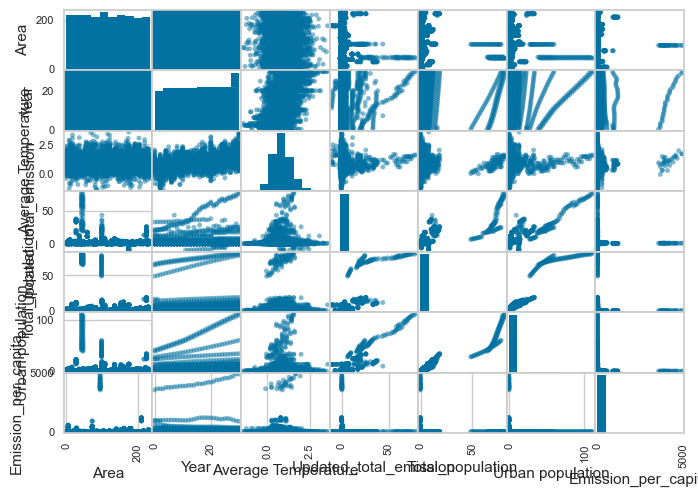

In [139]:
pd.plotting.scatter_matrix(agrifood_dm_df2)

In [140]:
cl_1= KMeans(n_clusters=3, init='k-means++').fit(agrifood_dm_df2)
cl_1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
silhouette_score(agrifood_dm_df2, cl_1.labels_)

0.8938220584716609

Clusters: 2 WCSS: 90587380.81 SS: 0.97
Clusters: 3 WCSS: 55801507.57 SS: 0.9
Clusters: 4 WCSS: 32093351.28 SS: 0.52
Clusters: 5 WCSS: 18609128.42 SS: 0.56
Clusters: 6 WCSS: 14114530.37 SS: 0.5
Clusters: 7 WCSS: 10842240.03 SS: 0.5
Clusters: 8 WCSS: 8589502.5 SS: 0.51
Clusters: 9 WCSS: 7182643.77 SS: 0.45
Clusters: 10 WCSS: 6493439.87 SS: 0.47
Clusters: 11 WCSS: 5625728.8 SS: 0.43
Clusters: 12 WCSS: 5057604.29 SS: 0.43
Clusters: 13 WCSS: 4672763.38 SS: 0.44
Clusters: 14 WCSS: 4214144.17 SS: 0.4


<Axes: xlabel='i'>

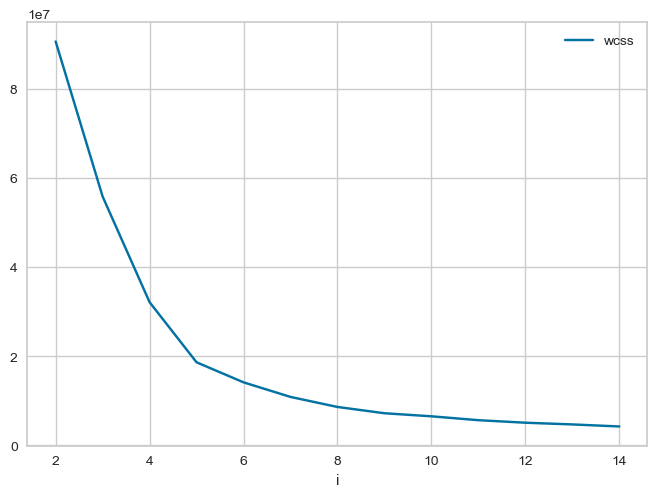

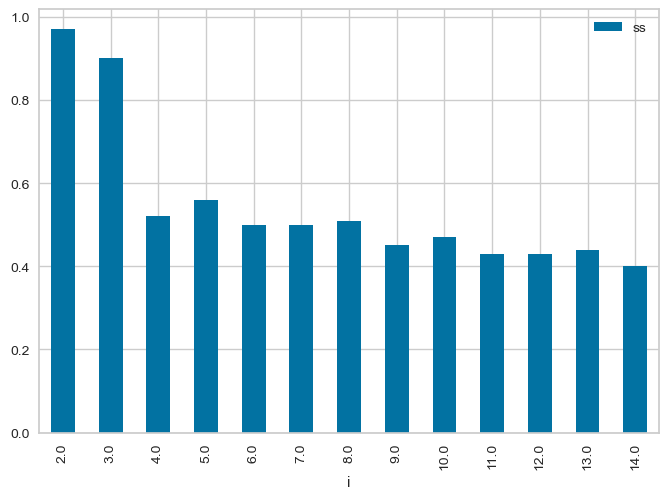

In [142]:
df_k=pd.DataFrame(columns=['i','wcss','ss'])
for i in range(2,15):
    wcss=round(KMeans(n_clusters=i,init='k-means++'). \
                                                            fit(agrifood_dm_df2).inertia_,2)
    ss=round(silhouette_score(agrifood_dm_df2, KMeans(n_clusters=i, \
                            init='k-means++').fit(agrifood_dm_df2).labels_), 2)
    print('Clusters:', i, 'WCSS:', wcss, 'SS:', ss)
    df_k.loc[len(df_k)]=[i,wcss,ss]

df_k.plot(x='i',y='wcss')
df_k.plot.bar(x='i',y='ss')

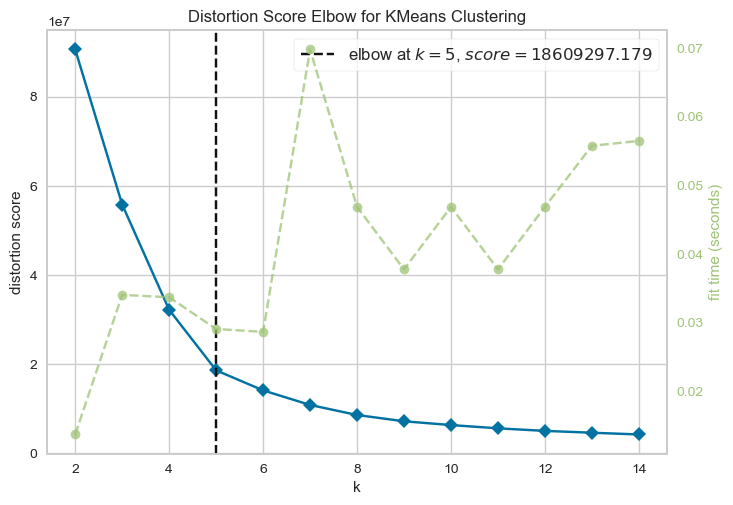

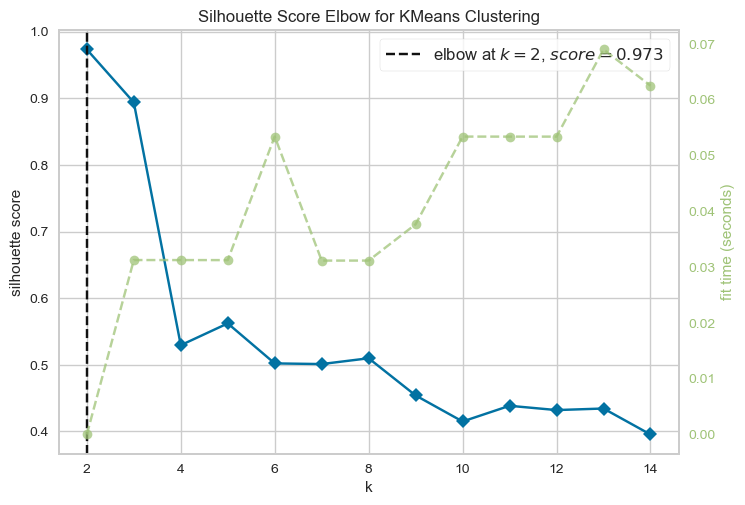

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [143]:
KElbowVisualizer(KMeans(init='k-means++'),k=(2,15)).fit(agrifood_dm_df2).show()

KElbowVisualizer(KMeans(init='k-means++'),k=(2,15), \
                 metric='silhouette').fit(agrifood_dm_df2).show()

In [144]:
cl_2= KMeans(n_clusters=5, init='k-means++').fit(agrifood_dm_df2)
agrifood_cl_1=pd.concat([agrifood_dm_df2,pd.Series(cl_2.labels_,name='cluster_1',\
                                       dtype='category')],axis=1)

agrifood_cl_1['cluster_1'].value_counts()

cluster_1
0    3387
2    3279
4     234
3      34
1      31
Name: count, dtype: int64

<Axes: xlabel='Average Temperature', ylabel='Emission_per_capita'>

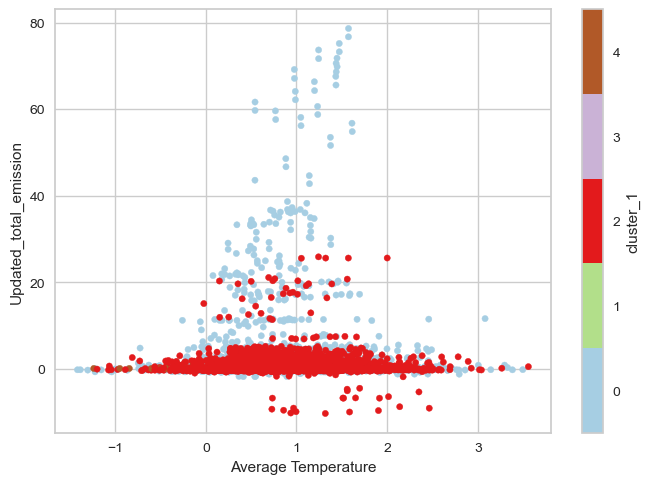

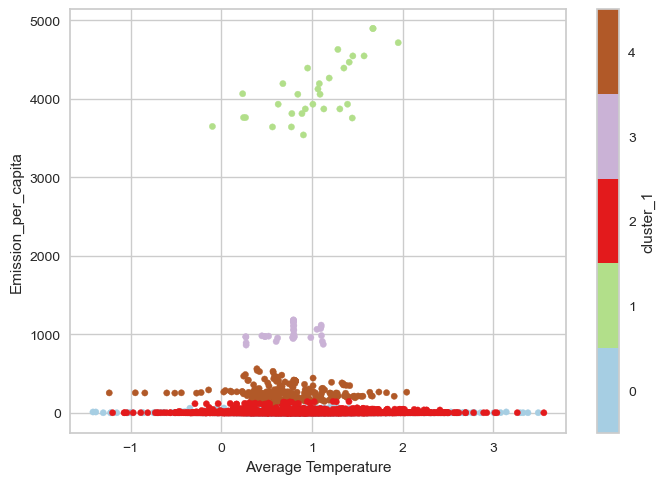

In [145]:
agrifood_cl_1.plot.scatter(x='Average Temperature',y='Updated_total_emission',c='cluster_1',cmap='Paired')

agrifood_cl_1.plot.scatter(x='Average Temperature',y='Emission_per_capita',c='cluster_1',cmap='Paired')

In [146]:
cl_3=AgglomerativeClustering(n_clusters=5, linkage='ward').fit(agrifood_dm_df2)

cl_3.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

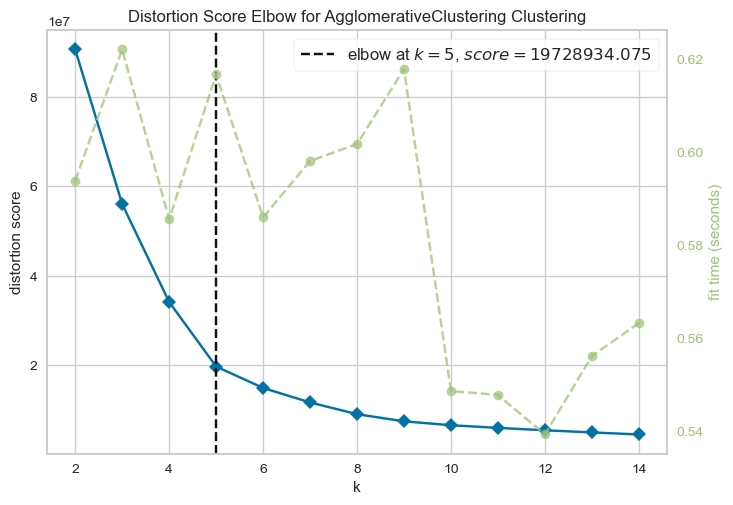

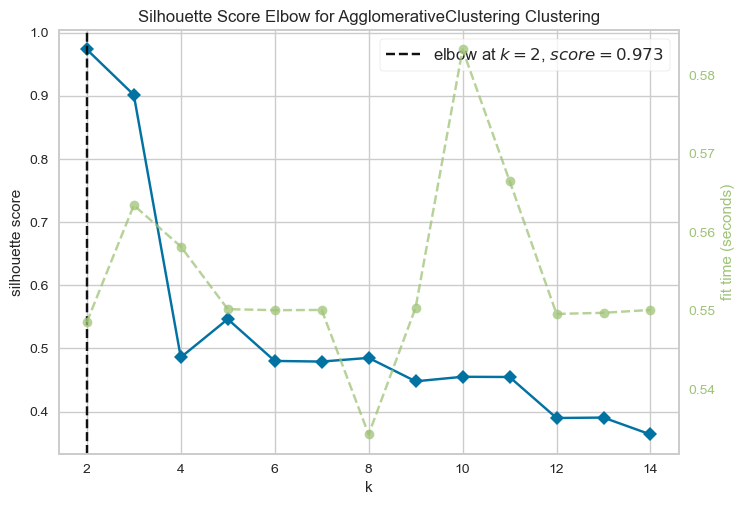

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [147]:
KElbowVisualizer(AgglomerativeClustering(linkage='ward'),k=(2,15)).fit(agrifood_dm_df2).show()

KElbowVisualizer(AgglomerativeClustering(linkage='ward'),k=(2,15), \
                 metric='silhouette').fit(agrifood_dm_df2).show()

In [148]:
cl_4=AgglomerativeClustering(n_clusters=5, linkage='ward').fit(agrifood_dm_df2)

agrifood_cl_2=pd.concat([agrifood_dm_df2,pd.Series(cl_4.labels_,name='cluster_2',\
                                                     dtype='category')],axis=1)

agrifood_cl_2['cluster_2'].value_counts()

cluster_2
0    3844
3    2781
4     275
2      34
1      31
Name: count, dtype: int64

<Axes: xlabel='Updated_total_emission', ylabel='Average Temperature'>

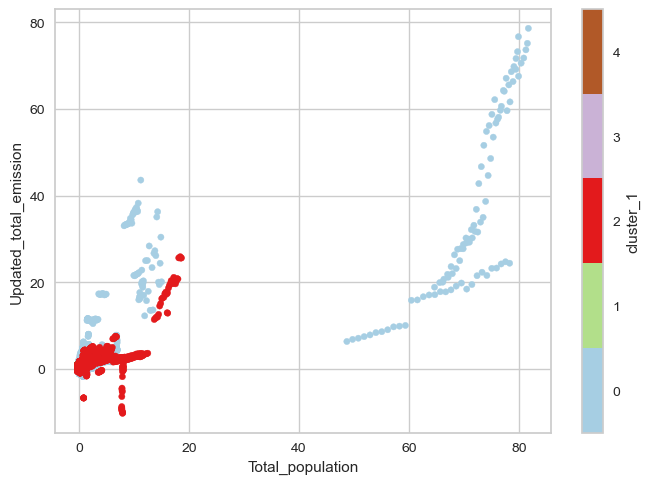

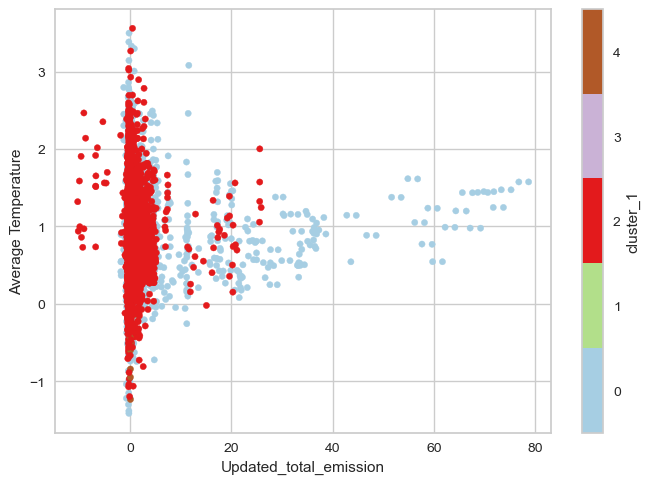

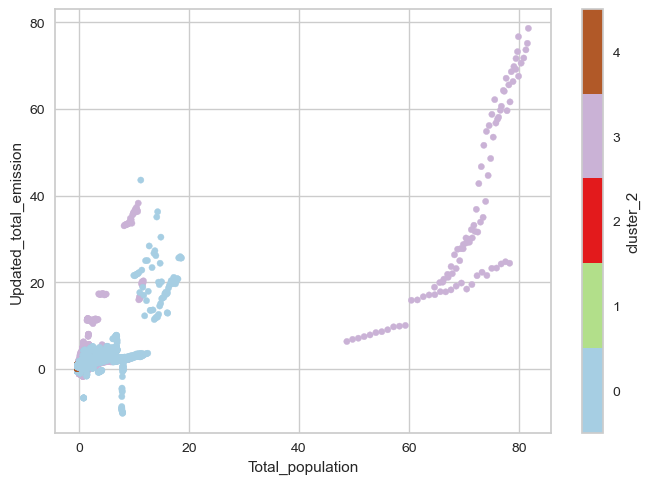

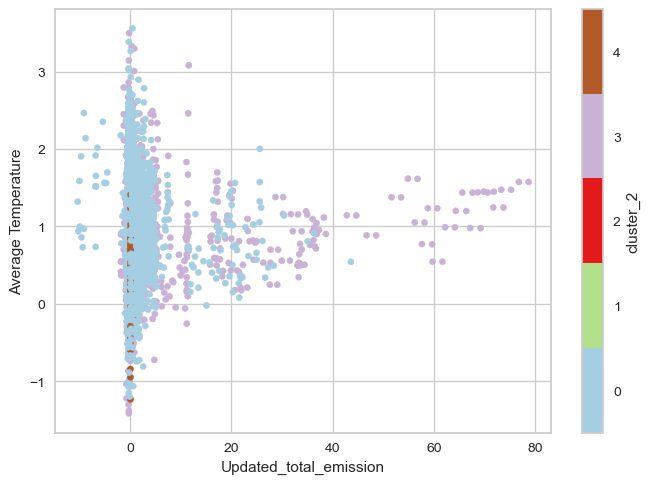

In [149]:
agrifood_cl_1.plot.scatter(x='Total_population',y='Updated_total_emission',c='cluster_1',cmap='Paired')
agrifood_cl_1.plot.scatter(x='Updated_total_emission',y='Average Temperature',c='cluster_1',cmap='Paired')

agrifood_cl_2.plot.scatter(x='Total_population',y='Updated_total_emission',c='cluster_2',cmap='Paired')
agrifood_cl_2.plot.scatter(x='Updated_total_emission',y='Average Temperature',c='cluster_2',cmap='Paired')

### 08-Interpretation
Regression

<Axes: >

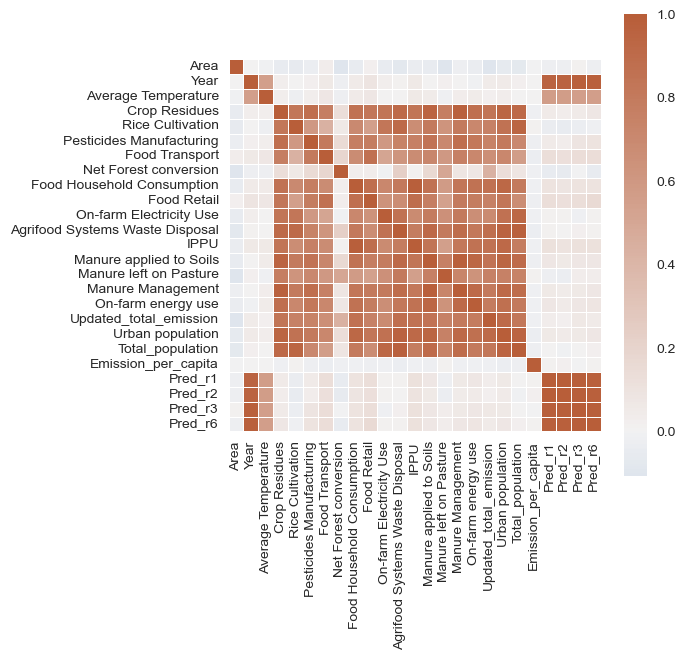

In [150]:
cols = agrifood_dm_df1.columns
# Correlation Heatmap
corr = agrifood_dm_df1[cols].corr()
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5)

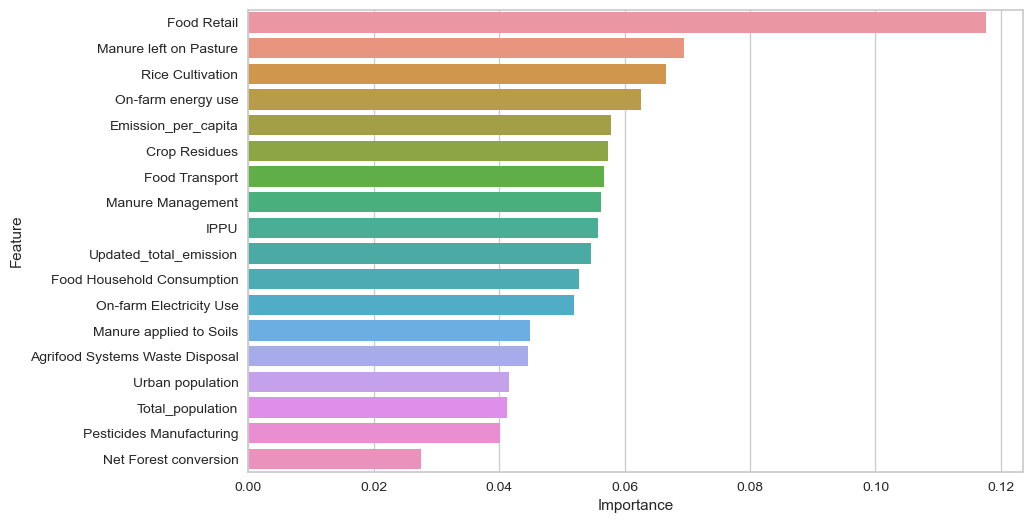

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, orient='h')
plt.show()

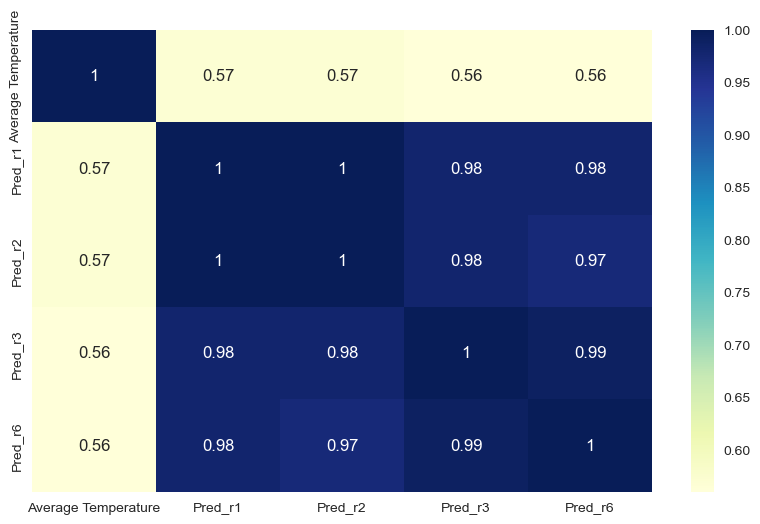

In [152]:
plt.figure(figsize=(10, 6))
sns.heatmap(pred_df, annot=True, cmap='YlGnBu')
plt.show()

Clustering

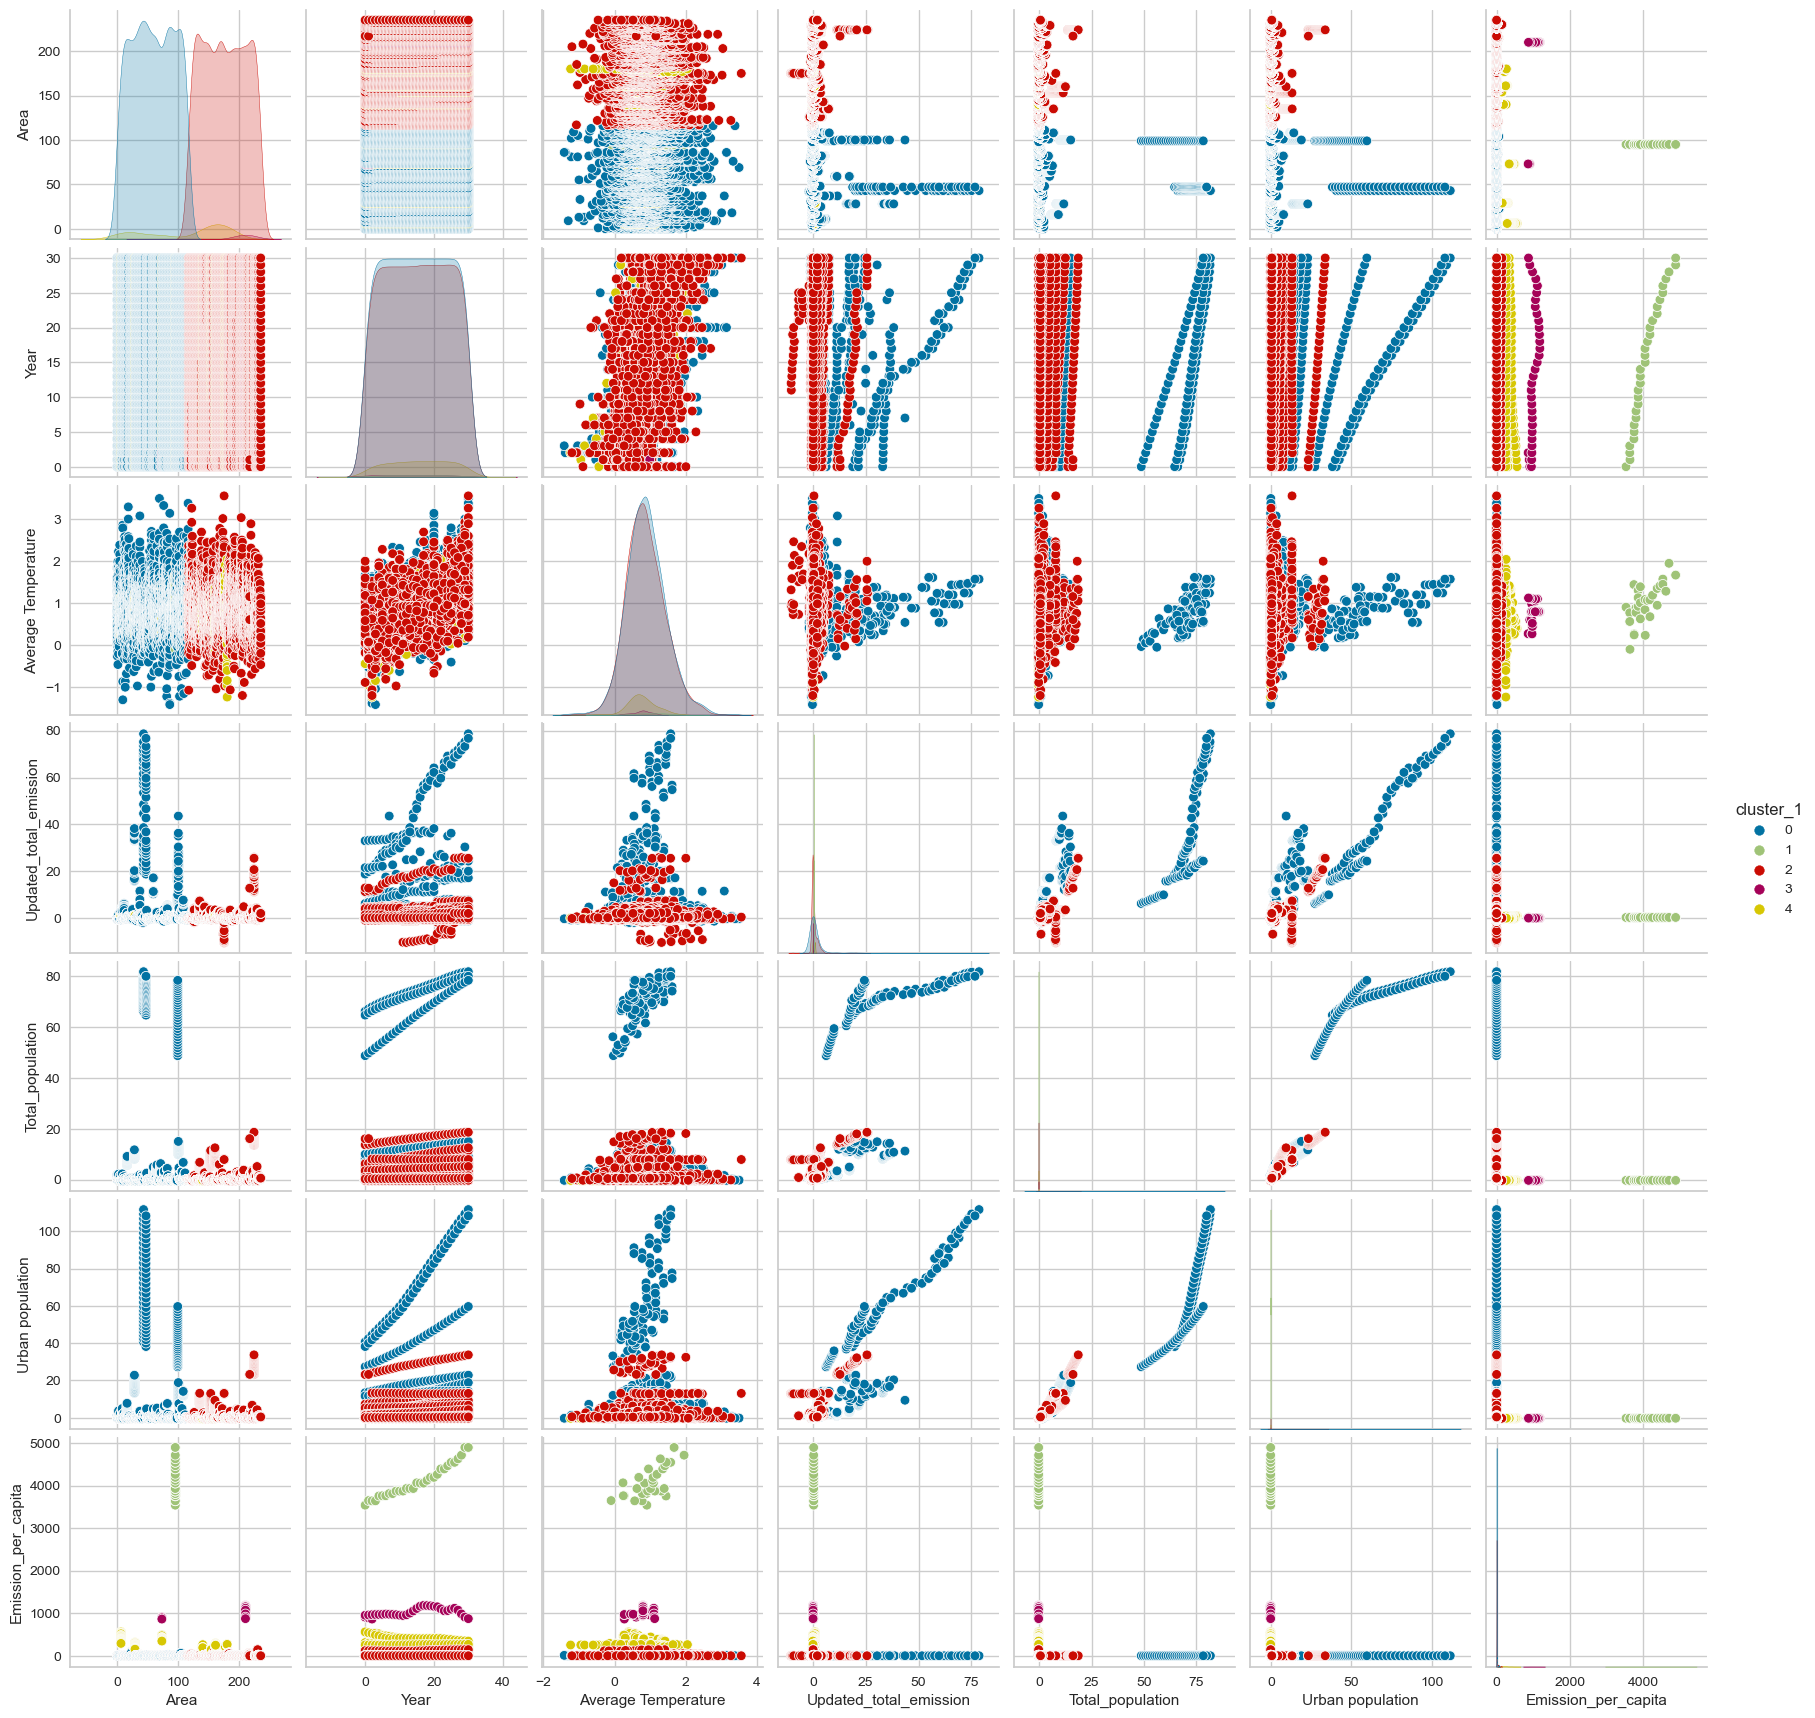

In [153]:
sns.pairplot(agrifood_cl_1, hue='cluster_1')

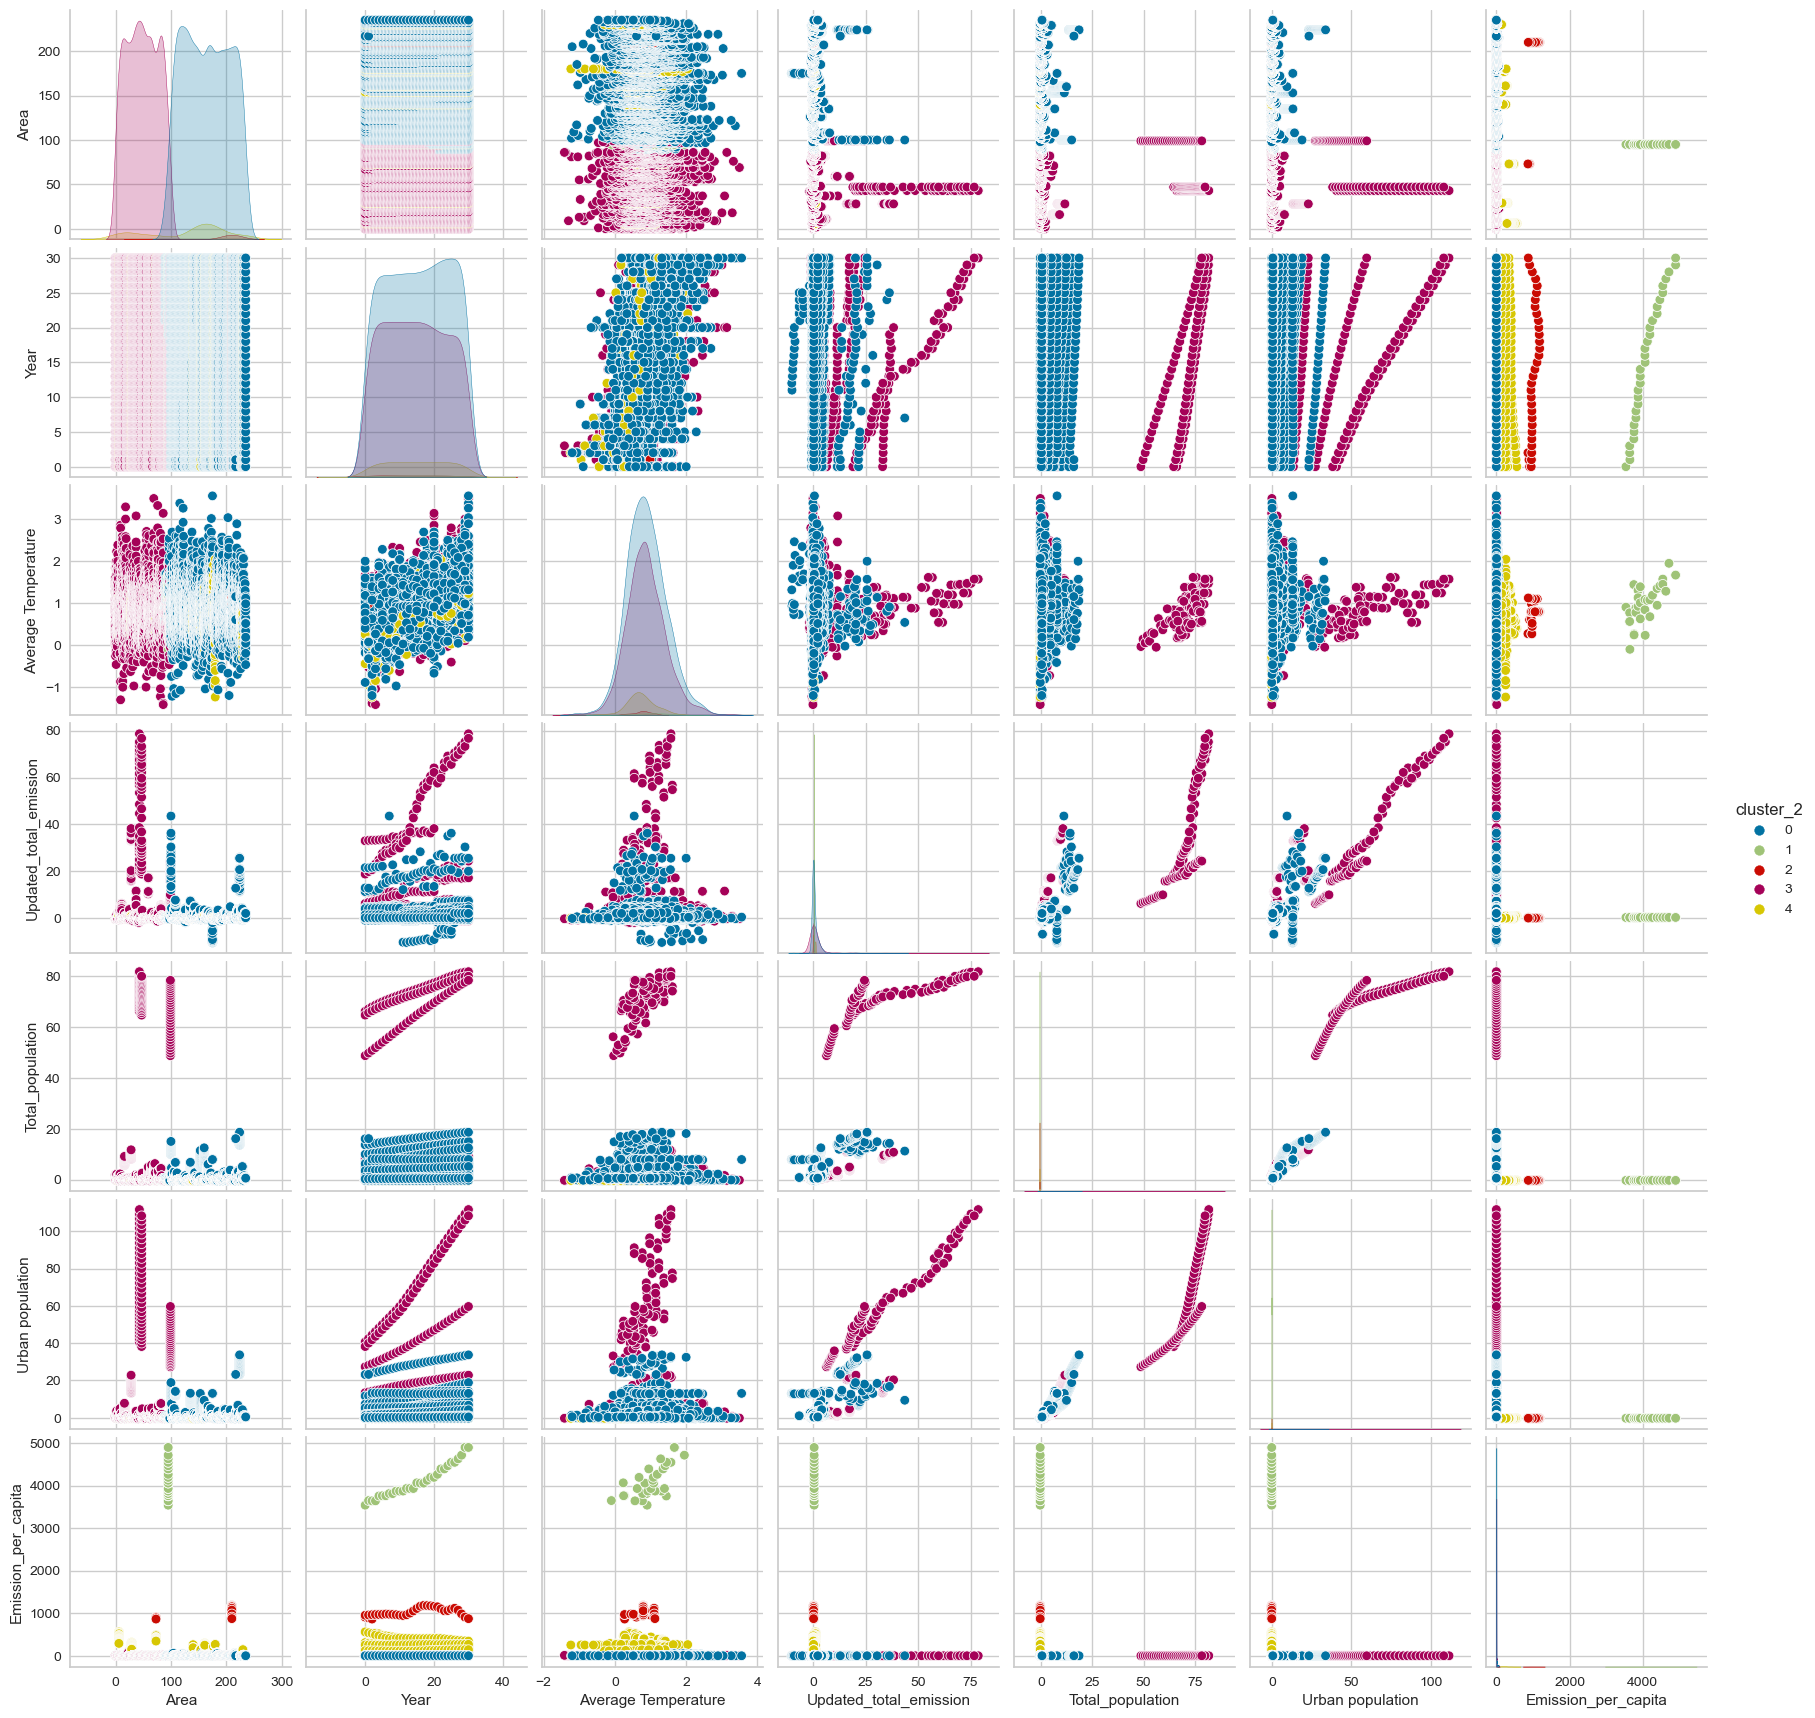

In [154]:
sns.pairplot(agrifood_cl_2, hue='cluster_2')

Descriptive statistic

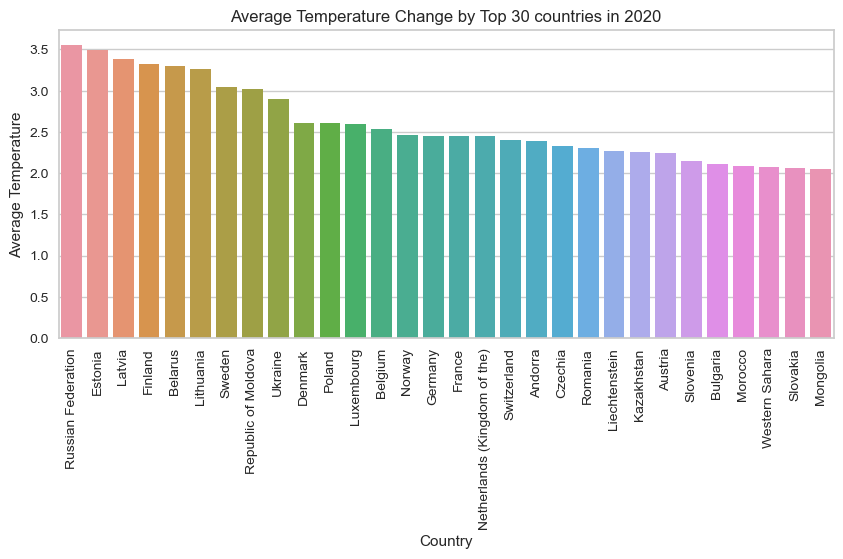

In [155]:
agrifood_2020 = agrifood_emission_df[agrifood_emission_df['Year']==2020]
temperature_2020 = agrifood_2020.sort_values('Average Temperature', ascending=False).head(30)

plt.figure(figsize=(10,4))
sns.barplot(x='Area', y='Average Temperature', data=temperature_2020)
plt.title('Average Temperature Change by Top 30 countries in 2020')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.xticks(rotation=90)
plt.show()

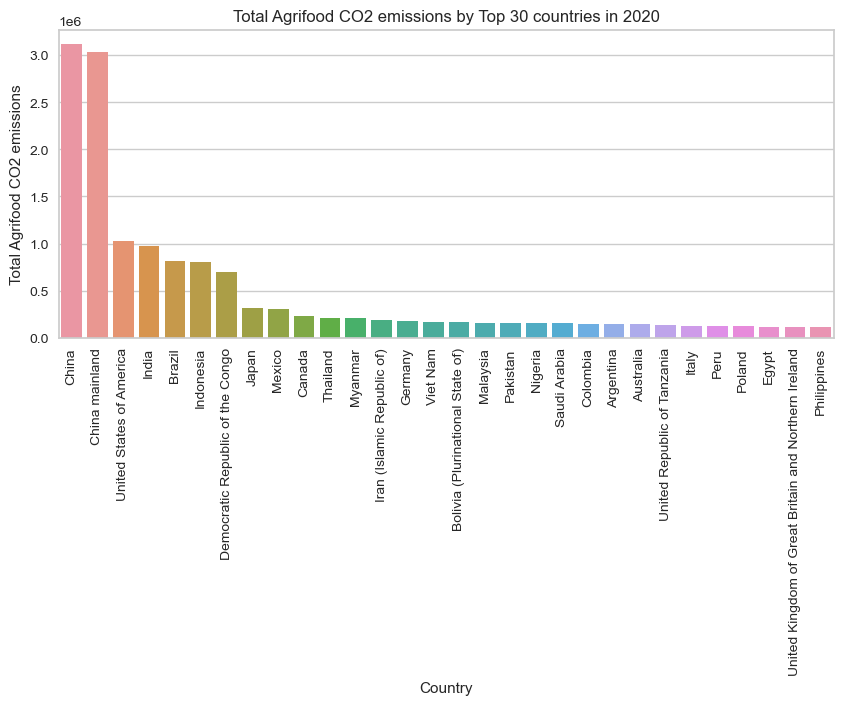

In [156]:
temperature_2020 = agrifood_2020.sort_values('Updated_total_emission', ascending=False).head(30)

plt.figure(figsize=(10,4))
sns.barplot(x='Area', y='Updated_total_emission', data=temperature_2020)
plt.title('Total Agrifood CO2 emissions by Top 30 countries in 2020')
plt.xlabel('Country')
plt.ylabel('Total Agrifood CO2 emissions')
plt.xticks(rotation=90)
plt.show()

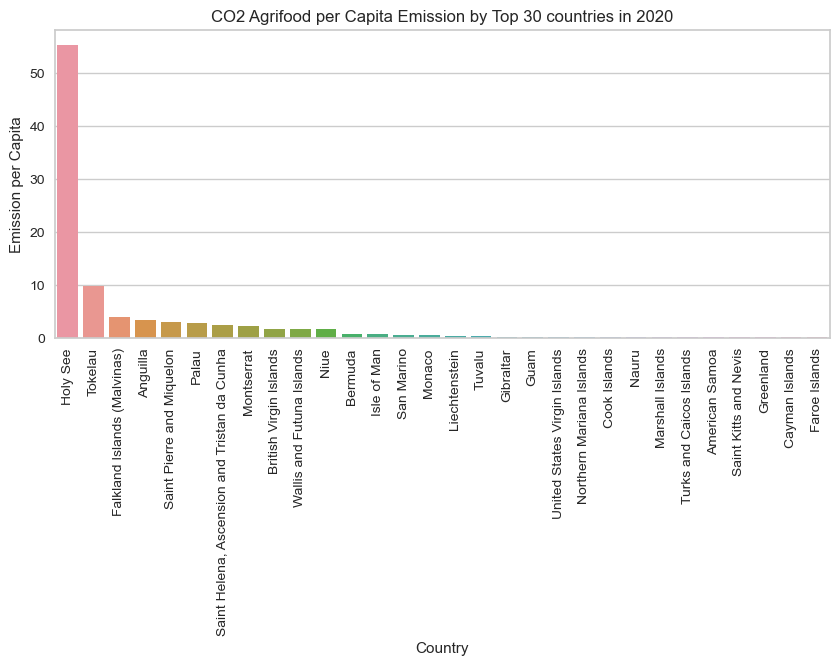

In [157]:
temperature_2020 = agrifood_2020.sort_values('Emission_per_capita', ascending=False).head(30)

plt.figure(figsize=(10,4))
sns.barplot(x='Area', y='Emission_per_capita', data=temperature_2020)
plt.title('CO2 Agrifood per Capita Emission by Top 30 countries in 2020')
plt.xlabel('Country')
plt.ylabel('Emission per Capita')
plt.xticks(rotation=90)
plt.show()

In [158]:
agrifood_2020.loc[agrifood_2020['Area']=='Russian Federation', ['Area', 'Average Temperature', 'Updated_total_emission', 'Emission_per_capita']]

Area  Average Temperature  Updated_total_emission  \
5261  Russian Federation             3.558083              34468.7909   

      Emission_per_capita  
5261             0.000237

In [159]:
agrifood_2020.loc[agrifood_2020['Area']=='China', ['Area', 'Average Temperature', 'Updated_total_emission', 'Emission_per_capita']]

Area  Average Temperature  Updated_total_emission  Emission_per_capita
1324  China                1.574            3.115114e+06             0.002138

In [160]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1.0, 10.0],
}

grid = GridSearchCV(model, param_grid, cv=5)

grid.fit(X_all, y)

print('Best parameters: ', grid.best_params_)

model = grid.best_estimator_

print(model.named_steps['ridge'].intercept_, model.named_steps['ridge'].coef_)

print(model.score(X_all, y))

agrifood_dm_df1['Pred_r7'] = model.predict(X_all)

Best parameters:  {'polynomialfeatures__degree': 1, 'ridge__alpha': 10.0}
0.8729890989691312 [ 0.         -0.01548198  0.3095326   0.00625147 -0.0542614  -0.06142295
  0.06453452  0.03299416  0.04954672 -0.08247003  0.03380828  0.07693855
  0.06122727  0.15735698 -0.08139313  0.05377511 -0.01026293 -0.07393301
 -0.06706597 -0.09028087  0.00825618]
0.3238007957900825


In [161]:
agrifood_dm_df1['Pred_r7'] = r1.predict(X_all)
agrifood_dm_df1

Area  Year  Average Temperature  Crop Residues  Rice Cultivation  \
0        0     0             0.536167       0.318966          0.111543   
1        0     1             0.020667       0.331274          0.105758   
2        0     2            -0.259583       0.290251          0.111543   
3        0     3             0.101917       0.398746          0.111543   
4        0     4             0.372250       0.434291          0.126004   
...    ...   ...                  ...            ...               ...   
6960   235    26             1.120250      -0.107195         -0.389123   
6961   235    27             0.046500       0.012052         -0.388726   
6962   235    28             0.516333       0.016348         -0.388583   
6963   235    29             0.985667      -0.187855         -0.388810   
6964   235    30             0.189000       0.011027         -0.388706   

      Pesticides Manufacturing  Food Transport  Net Forest conversion  \
0                    -0.010809       -0.120307              -0.005524   
1                    -0.011674       -0.121921              -0.005524   
2                    -0.011674       -0.128618              -0.005524   
3                    -0.011674       -0.127732              -0.005524   
4                    -0.011674       -0.128049              -0.005524   
...                        ...             ...                    ...   
6960                  0.561973        0.039171               1.948657   
6961                  0.489461        0.043115               1.948657   
6962                  0.480397        0.103581               1.948657   
6963                  0.543845        0.072285               1.948657   
6964                  0.543845        0.028668               1.948657   

      Food Household Consumption  Food Retail  ...  On-farm energy use  \
0                      -0.088036    -0.059473  ...            0.119616   
1                      -0.087042    -0.052769  ...            0.135709   
2                      -0.086844    -0.043720  ...            0.102248   
3                      -0.083802    -0.086336  ...            0.099069   
4                      -0.081156    -0.077815  ...            0.116706   
...                          ...          ...  ...                 ...   
6960                    0.033819     0.258339  ...            0.206113   
6961                   -0.000253     0.260532  ...            0.190213   
6962                    0.005430     0.305779  ...            0.246345   
6963                    0.017804     0.353180  ...            0.228462   
6964                    0.007389     0.377439  ...            0.228462   

      Updated_total_emission  Urban population  Total_population  \
0                  -0.293009          0.029327          0.326378   
1                  -0.289349          0.050322          0.329213   
2                  -0.289549          0.077928          0.403063   
3                  -0.289338          0.109114          0.512595   
4                  -0.285444          0.139586          0.594297   
...                      ...               ...               ...   
6960                2.141051          0.354641          0.537860   
6961                2.107279          0.368645          0.554653   
6962                2.120187          0.383379          0.571596   
6963                2.153656          0.398765          0.588616   
6964                2.090691          0.414763          0.606346   

      Emission_per_capita   Pred_r1   Pred_r2   Pred_r3   Pred_r6   Pred_r7  
0               -0.248271  0.369836  0.374181  0.345974  0.378519  0.369836  
1               -0.247180  0.404394  0.408528  0.380475  0.413122  0.404394  
2               -0.249620  0.437938  0.441562  0.414424  0.447064  0.437938  
3               -0.252270  0.471905  0.473817  0.447355  0.480975  0.471905  
4               -0.252968  0.505505  0.506507  0.481231  0.515350  0.505505  
...                   ...       ...       ...       ...       ... 

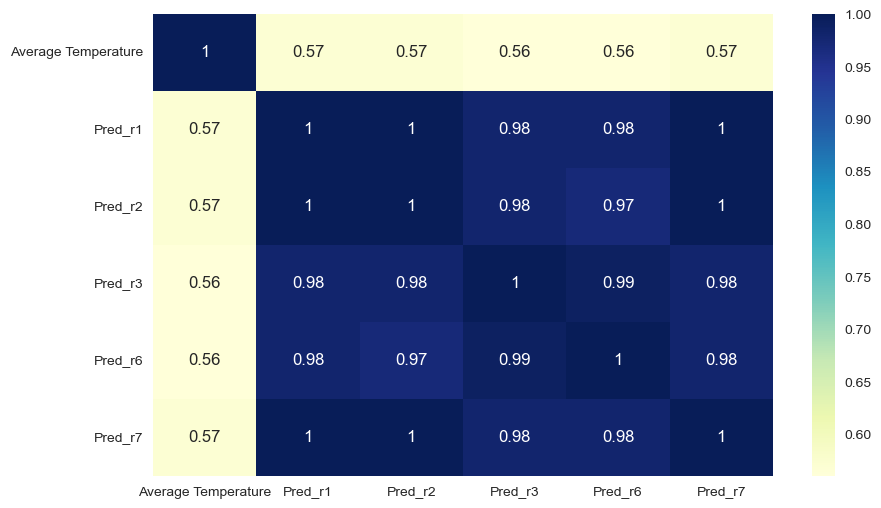

In [162]:
pred_df = round(agrifood_dm_df1[['Average Temperature', 'Pred_r1','Pred_r2','Pred_r3','Pred_r6', 'Pred_r7']].corr(), 2)
pred_df
plt.figure(figsize=(10, 6))
sns.heatmap(pred_df, annot=True, cmap='YlGnBu')
plt.show()

09-ACT<br>
Describe the Action Plan to Implement, Observe and Improve